In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette='rainbow')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300

___

 READ DATA 

In [2]:
df = pd.read_csv(r"E:\RELIANCE.BO(1).csv")
df.head()

Date       Open       High        Low      Close  Adj Close  \
0 2000-04-03  46.792412  47.656425  45.428555  46.928082  34.837685   
1 2000-04-04  46.556770  46.556770  43.179264  43.179264  32.054710   
2 2000-04-05  43.329216  44.557400  39.737488  43.164982  32.044102   
3 2000-04-06  43.272091  46.621037  43.207825  46.578194  35.390121   
4 2000-04-07  47.099457  50.305592  47.099457  50.305592  38.222210   

        Volume  
0  149518197.0  
1   94743234.0  
2  176360130.0  
3  113709263.0  
4   81828761.0

In [3]:
df.tail()[::-1]

Date         Open         High          Low        Close  \
5994 2024-03-28  2985.750000  3011.899902  2957.300049  2971.699951   
5993 2024-03-27  2896.000000  3000.000000  2894.000000  2985.699951   
5992 2024-03-26  2890.000000  2904.800049  2878.000000  2883.149902   
5991 2024-03-22  2899.949951  2920.000000  2894.699951  2910.050049   
5990 2024-03-21  2905.050049  2915.800049  2889.350098  2901.949951   

        Adj Close      Volume  
5994  2971.699951  10927182.0  
5993  2985.699951   8163322.0  
5992  2883.149902   5707953.0  
5991  2910.050049   9763804.0  
5990  2901.949951   6503468.0

* #EDA 

* #####  Dropping Unnecessary Variables:
    
   * As we need only Open, High, Low, Close prices and Volume with respective date for our prediction we are going to delete the remaining variables.

In [4]:
df_stock = df.drop(columns = ['Adj Close'])
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

* ##### <font color ='green'> <u>Data Summary</u>

In [5]:
# Dimensions of datasets:
print("Data Shape is : ", df_stock.shape)

Data Shape is :  (5995, 6)


> * <font color ="navy"> There are 5995 records with 6 variables.

* ##### <font color ='green'> <u>Descriptive Statistics

In [6]:
df_stock.drop(['Date'], axis = 1).describe()

Open         High          Low        Close        Volume
count  5985.000000  5985.000000  5985.000000  5985.000000  5.985000e+03
mean    689.167596   697.037309   680.734919   688.597025  1.711777e+07
std     735.384501   742.437318   727.973424   734.989083  1.839590e+07
min      29.976276    32.075615    29.076559    29.504995  0.000000e+00
25%     132.601105   133.815018   131.387207   132.793900  6.584133e+06
50%     433.347992   438.308258   427.953430   433.233704  1.046401e+07
75%     853.209595   861.758606   843.929077   851.746643  2.077055e+07
max    3011.550049  3024.899902  2974.449951  3014.800049  3.161448e+08

> * <font color ="navy"> Here we can observe the all price's satistical values are nearly close. We can also observe the Outliers with these values.

In [7]:
# Information about datasets:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5995 non-null   datetime64[ns]
 1   Open    5985 non-null   float64       
 2   High    5985 non-null   float64       
 3   Low     5985 non-null   float64       
 4   Close   5985 non-null   float64       
 5   Volume  5985 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 281.1 KB


> * <font color ="navy"> Date is datetime data-type and Other variables are float data-type. We can observe some null values, let's check null count.

* ##### <font color ='green'> <u> Checking Null Values</u>

In [8]:
# Checking for null Values:
df_stock.isna().sum()

Date       0
Open      10
High      10
Low       10
Close     10
Volume    10
dtype: int64

> * <font color ="navy"> There are 10 null records in every variable except Date column. Let's Check those records.

In [9]:
# Records with null values:
df_stock[df_stock.isna().any(axis=1)]

Date  Open  High  Low  Close  Volume
790  2003-04-14   NaN   NaN  NaN    NaN     NaN
1060 2004-04-26   NaN   NaN  NaN    NaN     NaN
1182 2004-10-13   NaN   NaN  NaN    NaN     NaN
2498 2010-02-06   NaN   NaN  NaN    NaN     NaN
2976 2012-01-07   NaN   NaN  NaN    NaN     NaN
3015 2012-03-03   NaN   NaN  NaN    NaN     NaN
3145 2012-09-08   NaN   NaN  NaN    NaN     NaN
3187 2012-11-11   NaN   NaN  NaN    NaN     NaN
3524 2014-03-22   NaN   NaN  NaN    NaN     NaN
3753 2015-02-28   NaN   NaN  NaN    NaN     NaN

> * <font color ="navy"> Let's Drop these 10 null records as they are not necessary for our forecasting 

In [10]:
df_stock = df_stock.dropna().reset_index(drop= True)
df_stock.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df_stock.tail(3)[::-1]

Date     Open         High          Low        Close      Volume
5984 2024-03-28  2985.75  3011.899902  2957.300049  2971.699951  10927182.0
5983 2024-03-27  2896.00  3000.000000  2894.000000  2985.699951   8163322.0
5982 2024-03-26  2890.00  2904.800049  2878.000000  2883.149902   5707953.0

In [12]:
df_stock.shape

(5985, 6)

> * <font color ="navy"> After Dropping the null values we remained with 5985 records with 6 variables.

* ##### <font color ='green'><u> Checking for Duplicate Records and Removing if any

In [13]:
df_stock.duplicated().sum()

0

> * <font color ="navy"> There no duplicated records.

* ##### <font color ='green'><u> Checking Correlated Variables:

In [14]:
df_stock.corr()

Date      Open      High       Low     Close    Volume
Date    1.000000  0.847274  0.847370  0.847262  0.847272 -0.491437
Open    0.847274  1.000000  0.999891  0.999885  0.999775 -0.334273
High    0.847370  0.999891  1.000000  0.999852  0.999910 -0.332689
Low     0.847262  0.999885  0.999852  1.000000  0.999902 -0.335508
Close   0.847272  0.999775  0.999910  0.999902  1.000000 -0.333931
Volume -0.491437 -0.334273 -0.332689 -0.335508 -0.333931  1.000000

> * <font color ="navy"> All the Attributes have high positive correlation except Volume.

___

* ### <font color = 'candy'> <u> VISUALISATION </u>

* ##### <font color ='green'><u>LINE PLOT</u> : Visualising the Trend and Seasonality 

In [15]:
plt.figure(figsize= (20,30))
plt.subplot(5,1,1)
sns.lineplot(x = df_stock['Date'], y = df_stock['Close'])
plt.title("Closing Price Trend")
plt.subplot(5,1,2)
sns.lineplot(x = df_stock['Date'], y = df_stock['Open'])
plt.title("Opening Price Trend")
plt.subplot(5,1,3)
sns.lineplot(x = df_stock['Date'], y = df_stock['High'])
plt.title("High Price Trend")
plt.subplot(5,1,4)
sns.lineplot(x = df_stock['Date'], y = df_stock['Low'])
plt.title("Low Price Trend")
plt.subplot(5,1,5)
sns.lineplot(x = df_stock['Date'], y = df_stock['Volume'])
plt.title("Volume Trend")
plt.tight_layout()

> * <font color ="navy"> We can observe the <b>exponential trend</b> in all "Close", "Open", "High" and "Low" Stock prices. But we can't see any seasonal component over the period for these variables. Also these prices have almost same trend over the period.
> * <font color ="navy"> In Volume we see major fluctuations in period from 2000 to 2006 but the overall trend is <b>constant</b>. During this period large number of shares are sold then frequency of share volume decreased later on.

* ##### <font color ='green'><u>KDE PLOT</u>: Visualising Data Distribution 

<Axes: xlabel='Low', ylabel='Density'>

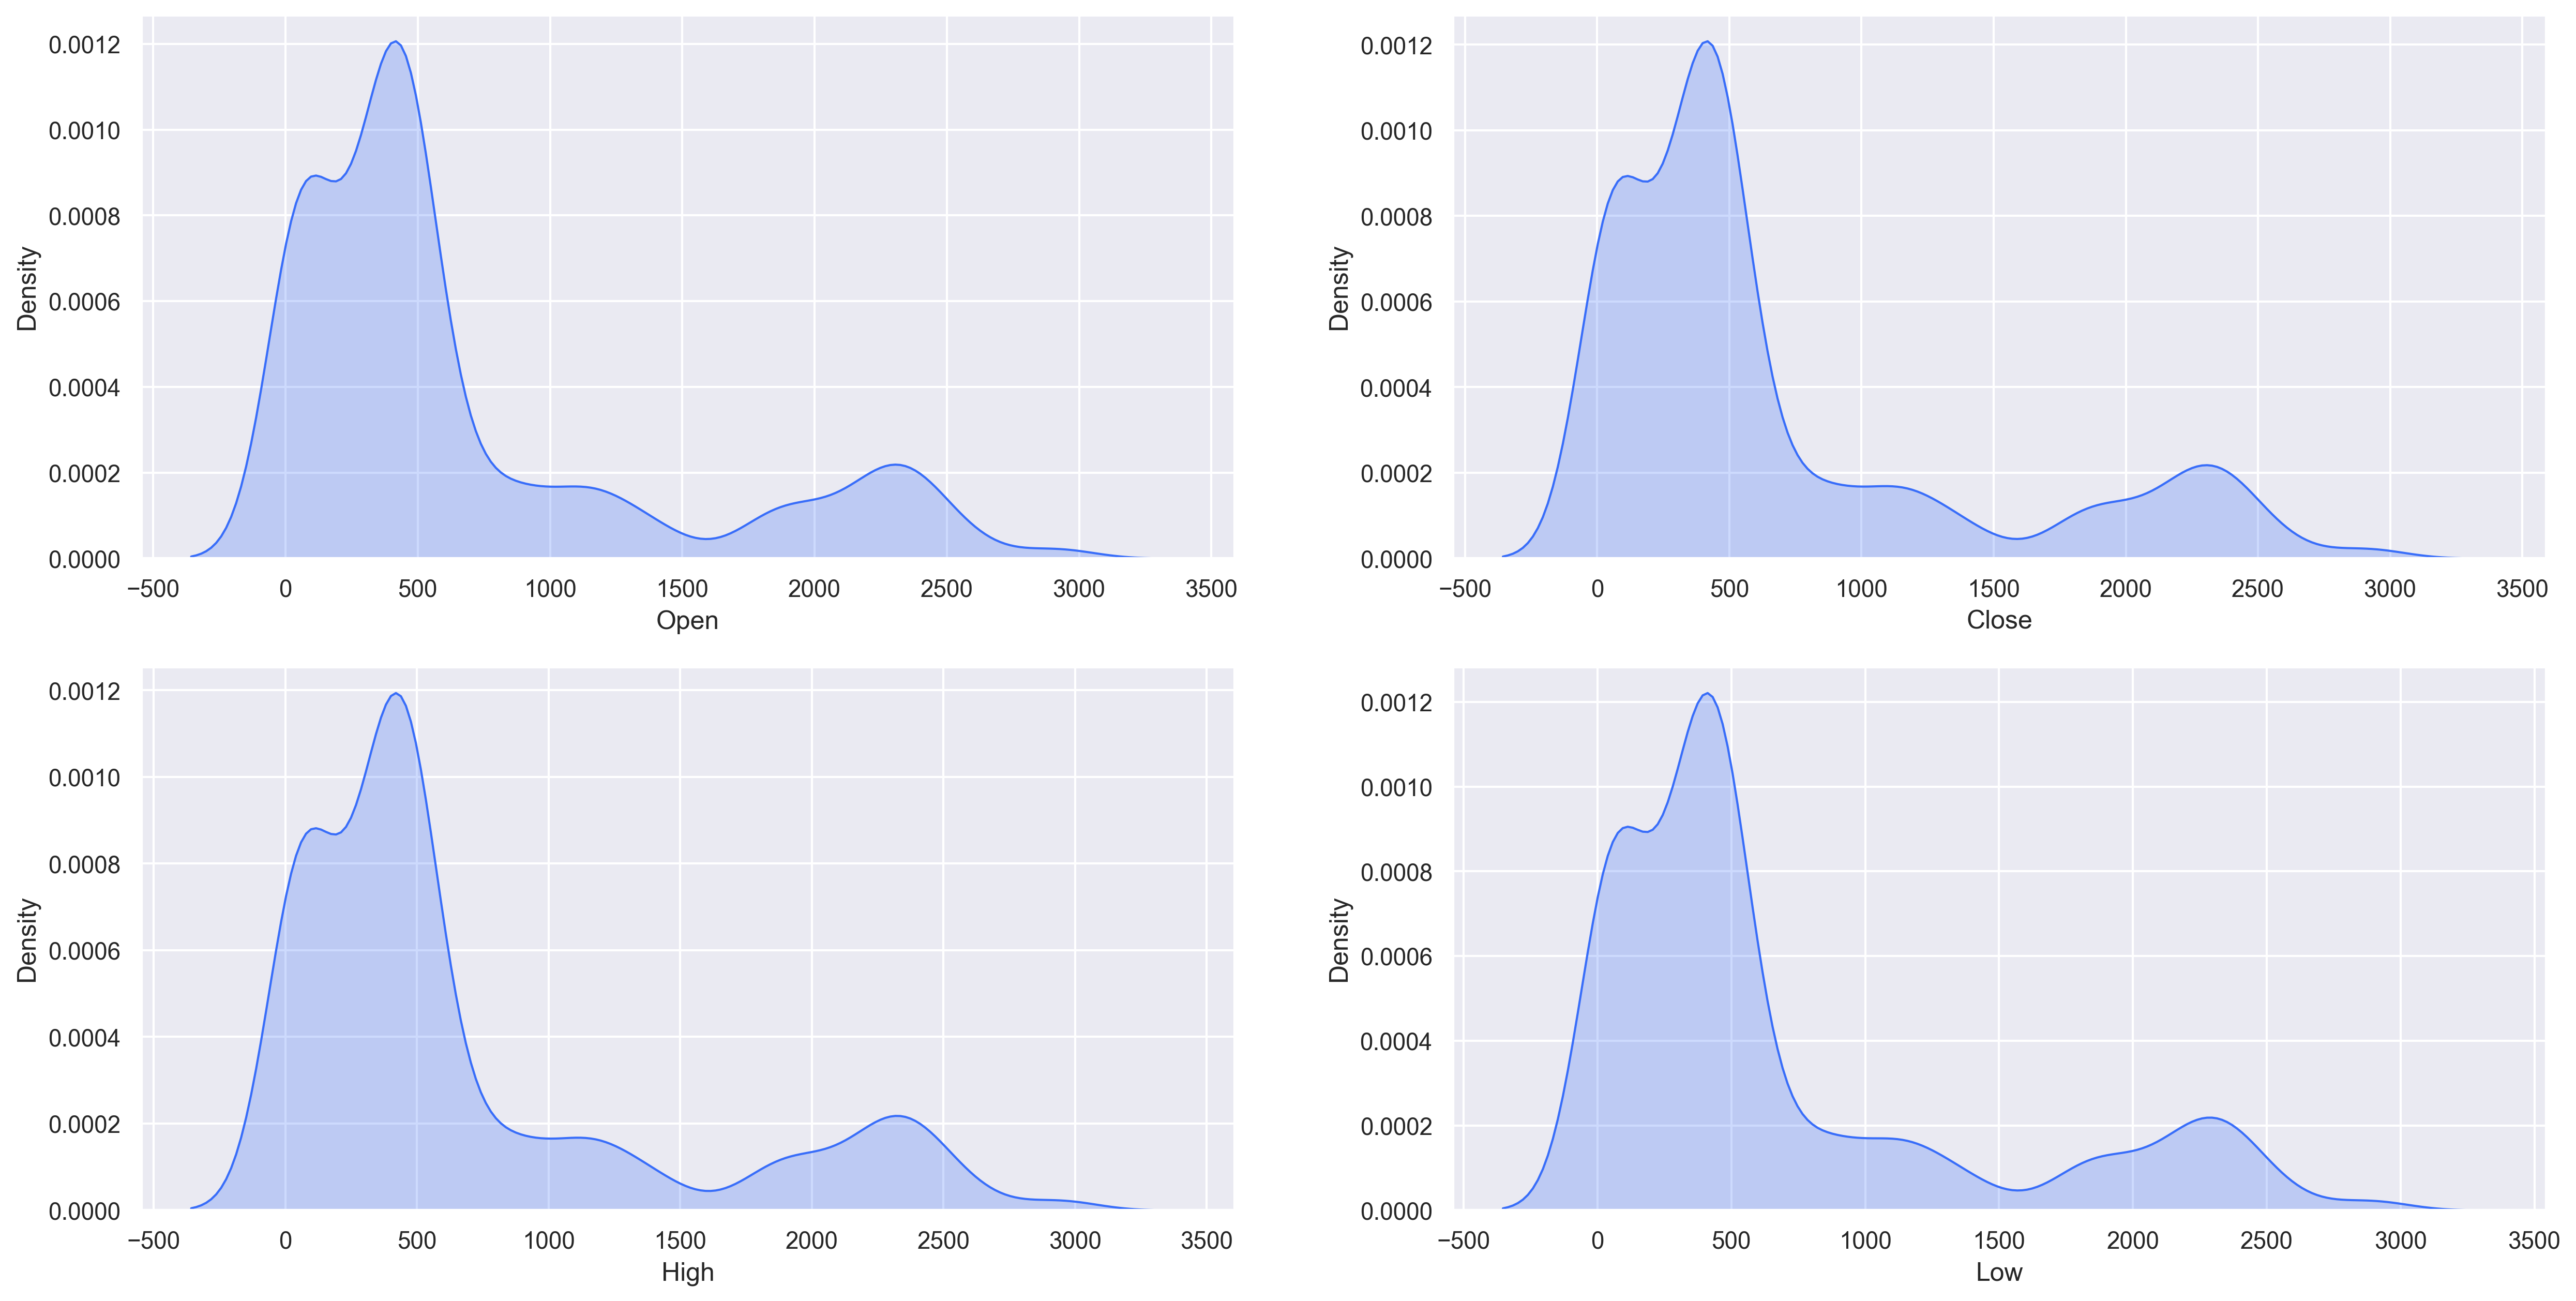

In [16]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df_stock['Open'], shade = True)
plt.subplot(2,2,2)
sns.kdeplot(df_stock['Close'], shade = True)
plt.subplot(2,2,3)
sns.kdeplot(df_stock['High'], shade = True)
plt.subplot(2,2,4)
sns.kdeplot(df_stock['Low'], shade = True)

<Axes: xlabel='Volume', ylabel='Density'>

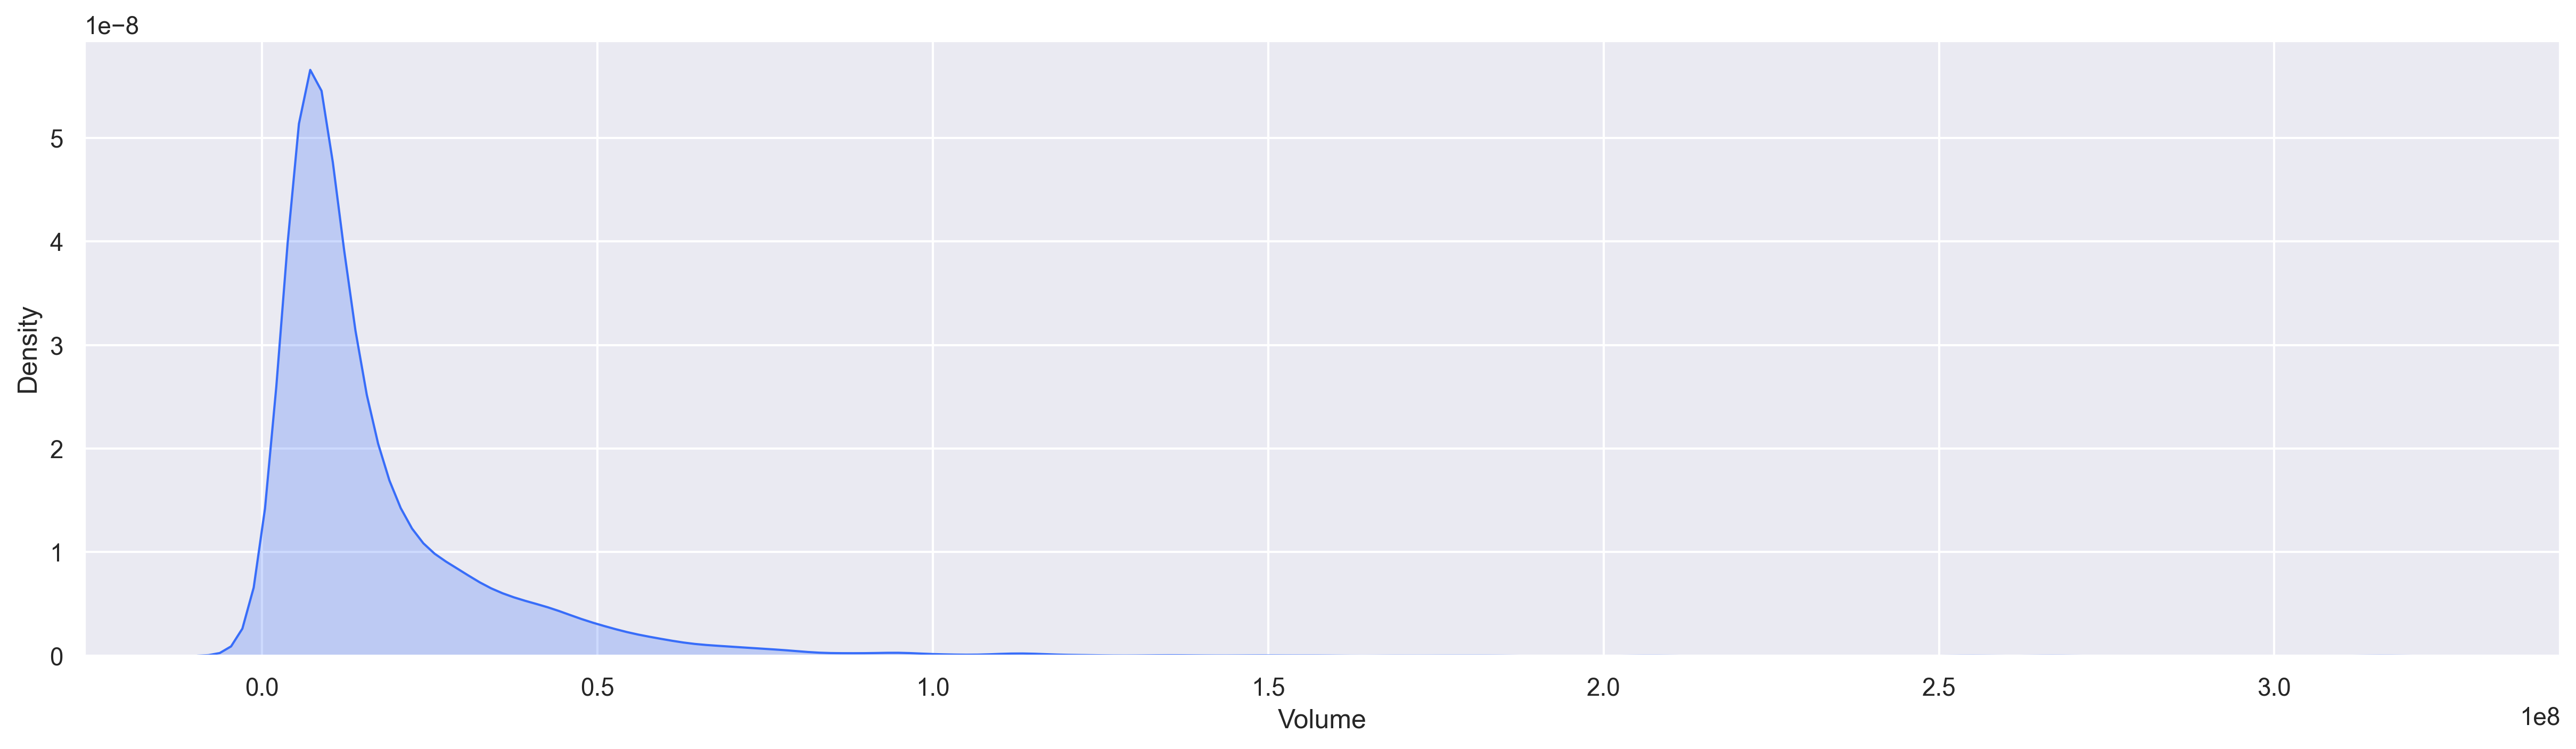

In [17]:
sns.kdeplot(df_stock['Volume'], shade = True)

> * <font color ="navy"> Right skewness is observed in all the variables.
> * <font color ="navy"> During the period majority of the times stock prices lie around 500.

* ##### <font color ='green'><u>BOX PLOT</u>: Visualising Outilers

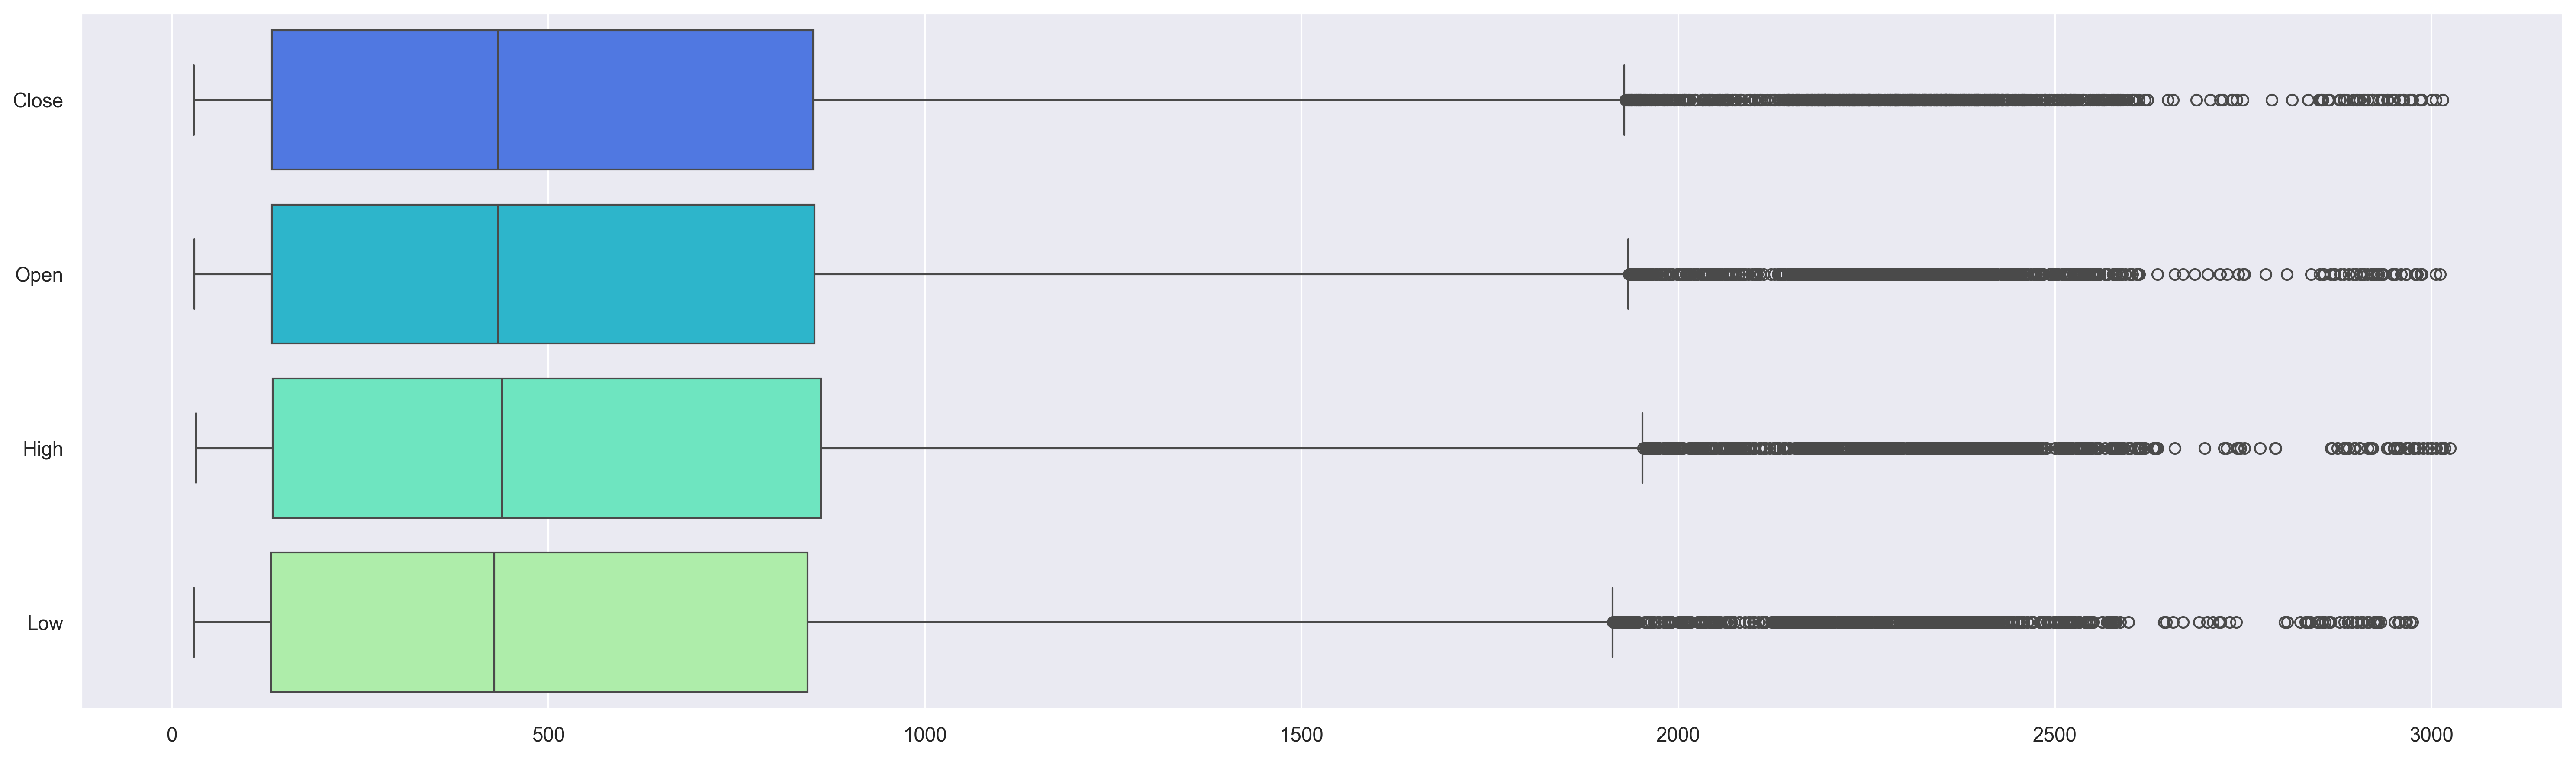

In [18]:
plt.figure(figsize= (20,6))
sns.boxplot(df_stock[['Close','Open','High','Low']], orient='h')
plt.tight_layout()

<Axes: xlabel='Volume'>

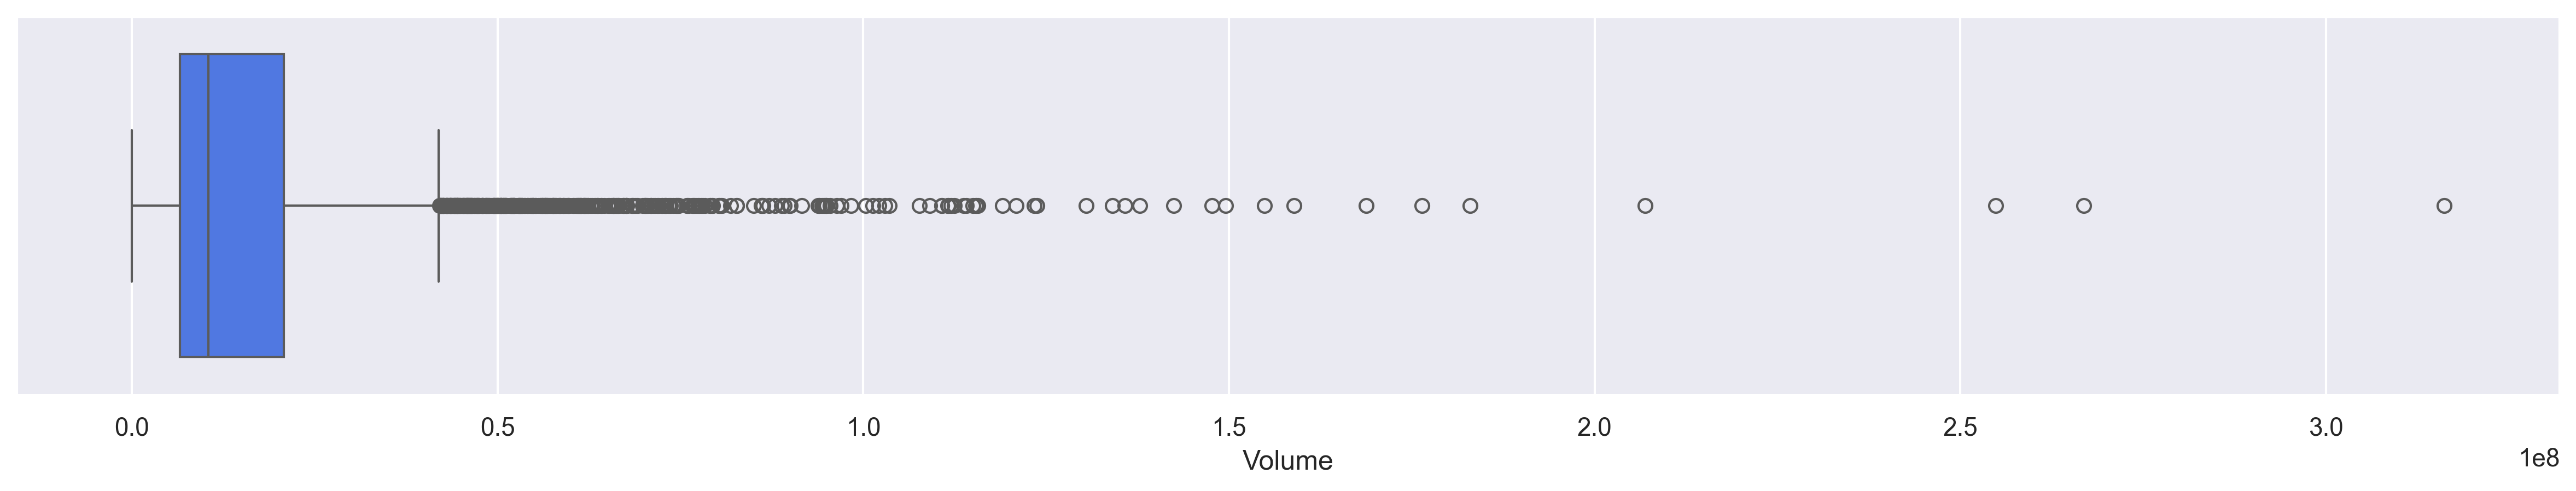

In [19]:
plt.figure(figsize= (20,3))
sns.boxplot(df_stock['Volume'], orient= "h")

> * <font color ="navy"> In boxplots of Prices we can observe there are outliers on upper extreme. We will not remove or replace these values as these prices are at upper extreme, this may be due to upward exponential trend in our data.
> * <font color ="navy"> As we seen all prices are nearly same statistical values and have similar trend and pattern in different visualisations. So for forecasting purpose we will choose only "Close" price.

* ##### <font color ='green'><u>LAG PLOT</u> : Visualising dependence on previous data

Text(0.5, 1.0, 'Lag Plot for Close Price')

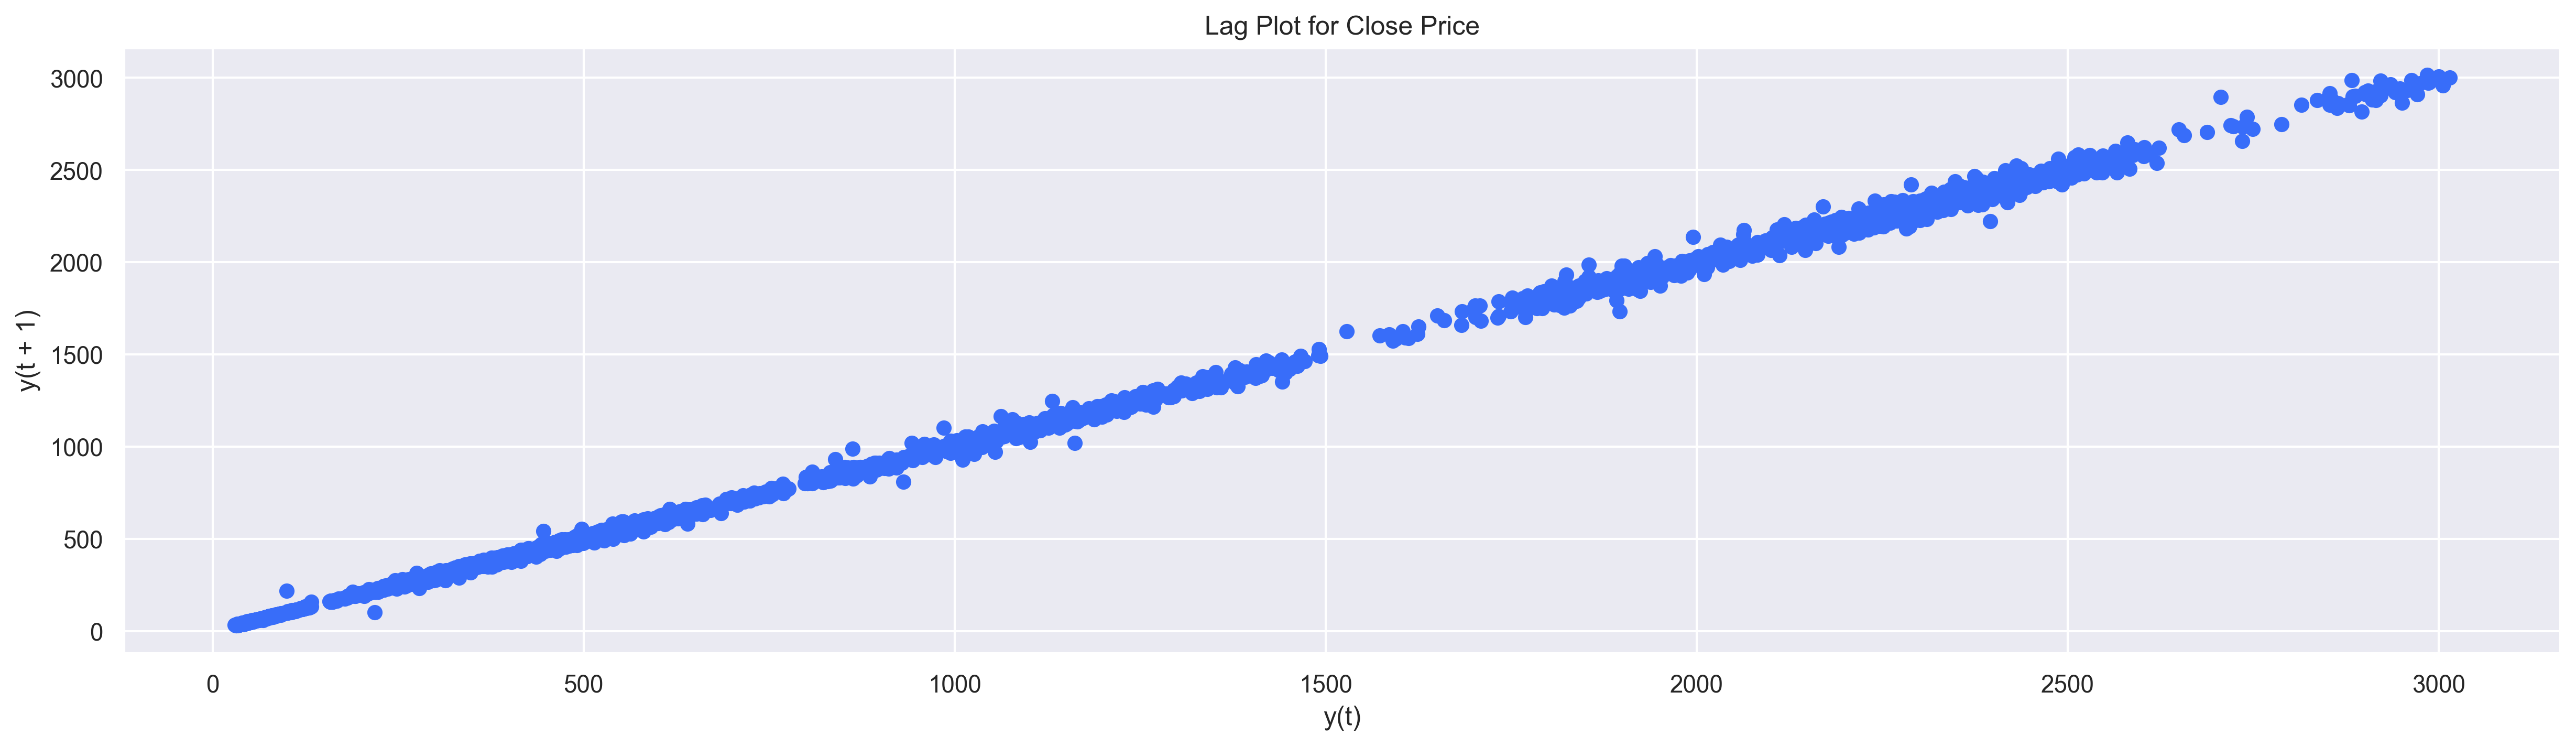

In [20]:
from pandas.plotting import lag_plot
lag_plot(df_stock['Close'])
plt.title("Lag Plot for Close Price" )

> * <font color ="navy"> We get a linear upward relationship in above lag plot, shows the current stock prices positively depend on previous stock prices. This means the previous version of data is important to predict the current data.

* ##### <font color ='green'><u>ACF PLOT</u> : Visualising impacting lag variables 

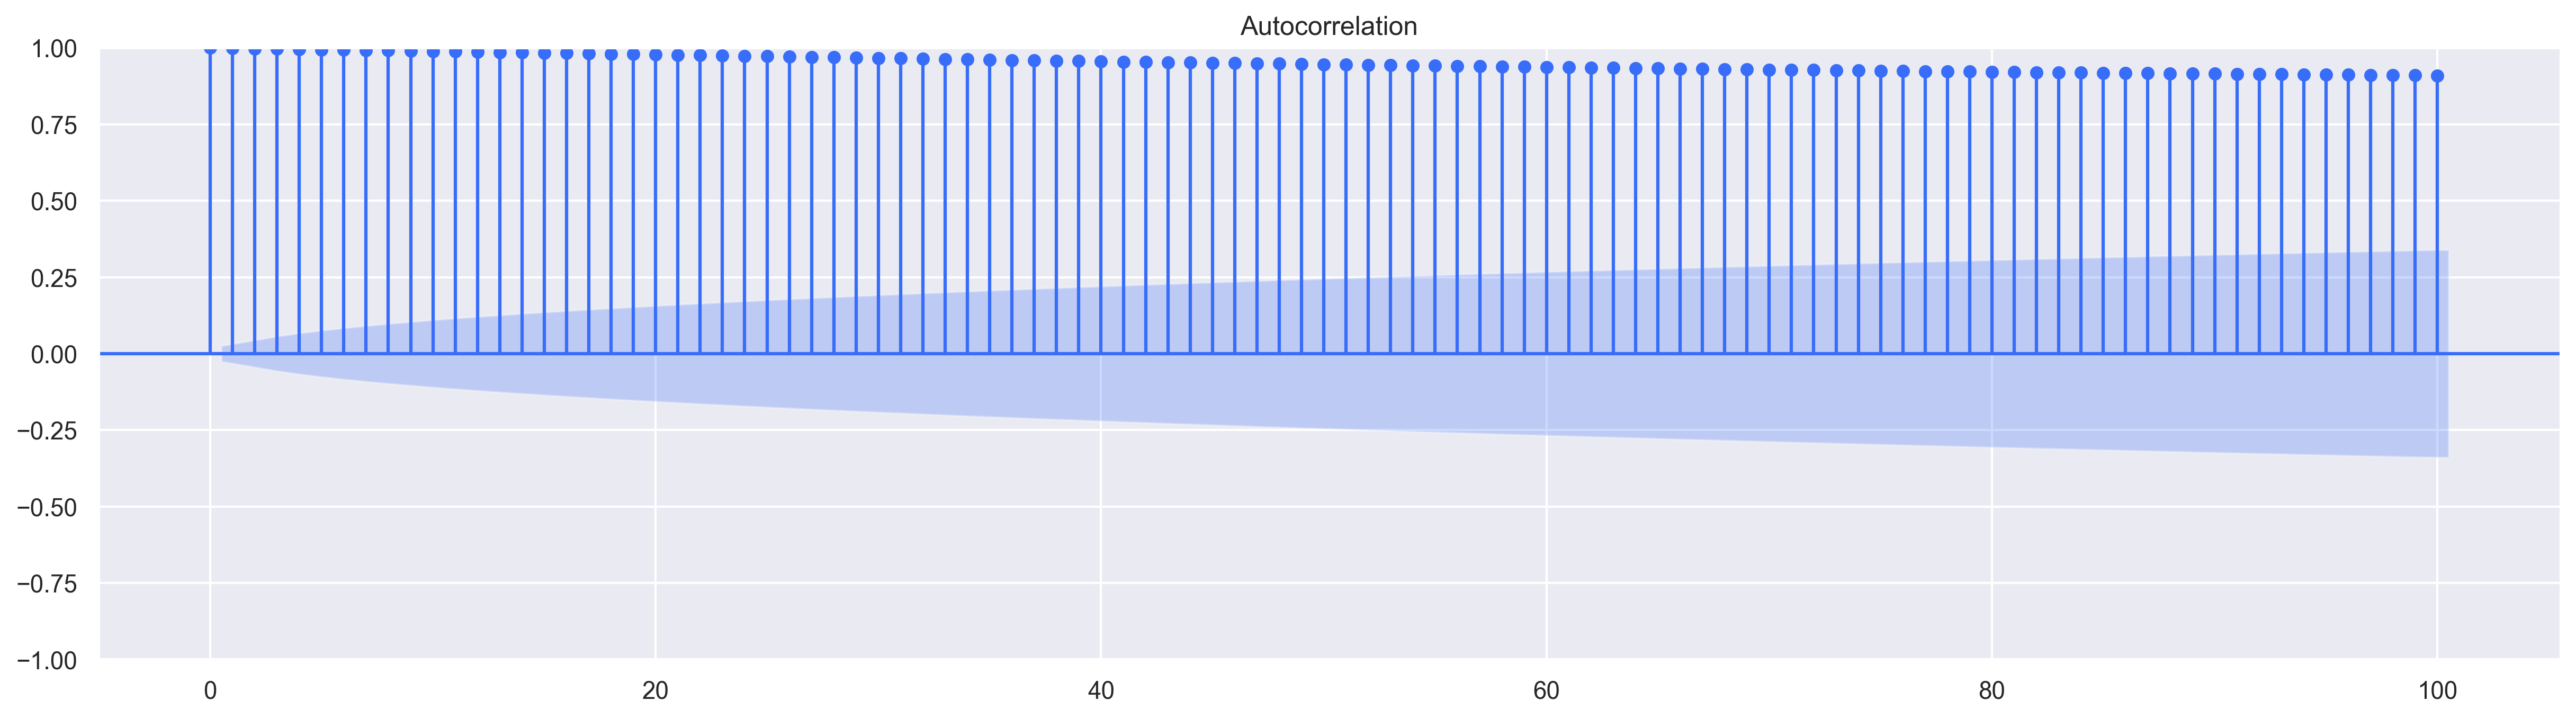

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_stock['Close'], lags = 100)
plt.show()

> * <font color ="navy"> Above ACF plot shows that 100 lag variables crossing the postitive Standard Error, indicates that previous 100 day's stock prices affect the current prices.

* ##### <font color ='green'><u>PACF PLOT</u> : Visualising Directly impacting lag variables 

<Figure size 4800x1800 with 0 Axes>

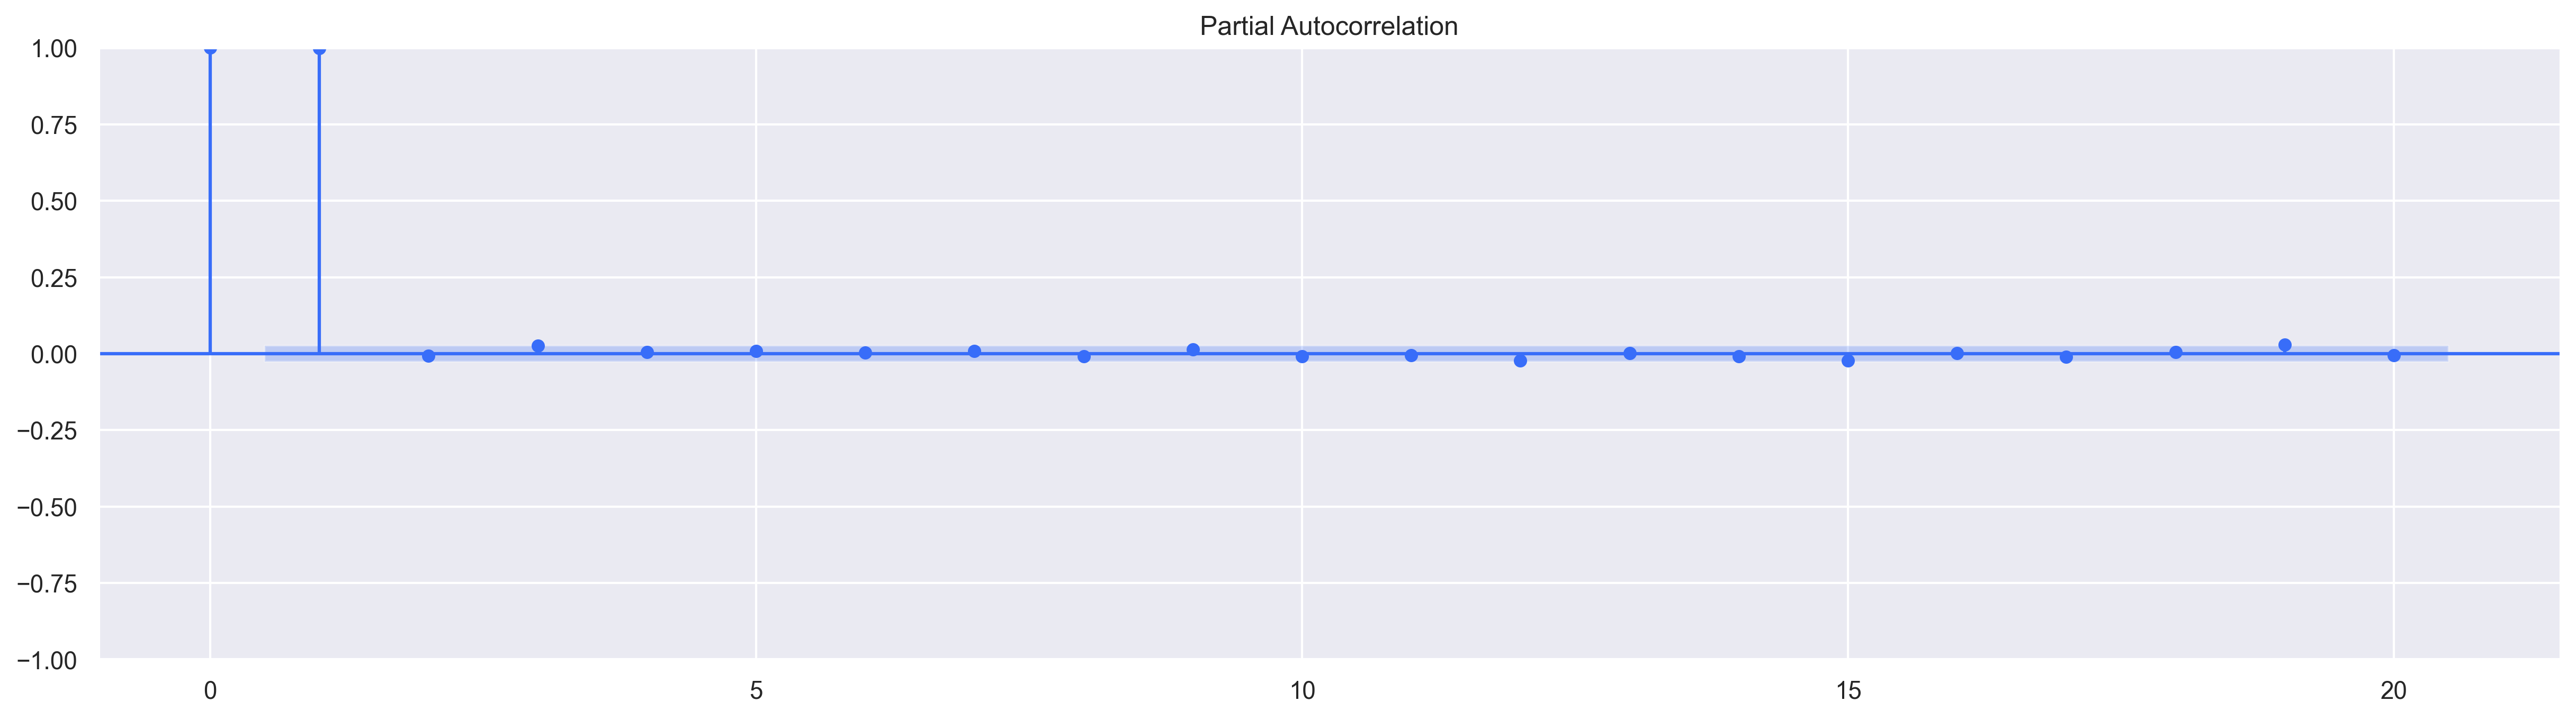

In [22]:
plt.figure(figsize=(16,6))
plot_pacf(df_stock['Close'], lags = 20)
plt.show()

> * <font color ="navy"> PACF plot indicated that only last day's stock prices have <b>direct impact</b> on current day's stock prices.

* ##### <font color ='green'><u>MOVING AVERAGE LINE PLOTS</u> : Removing Noise 

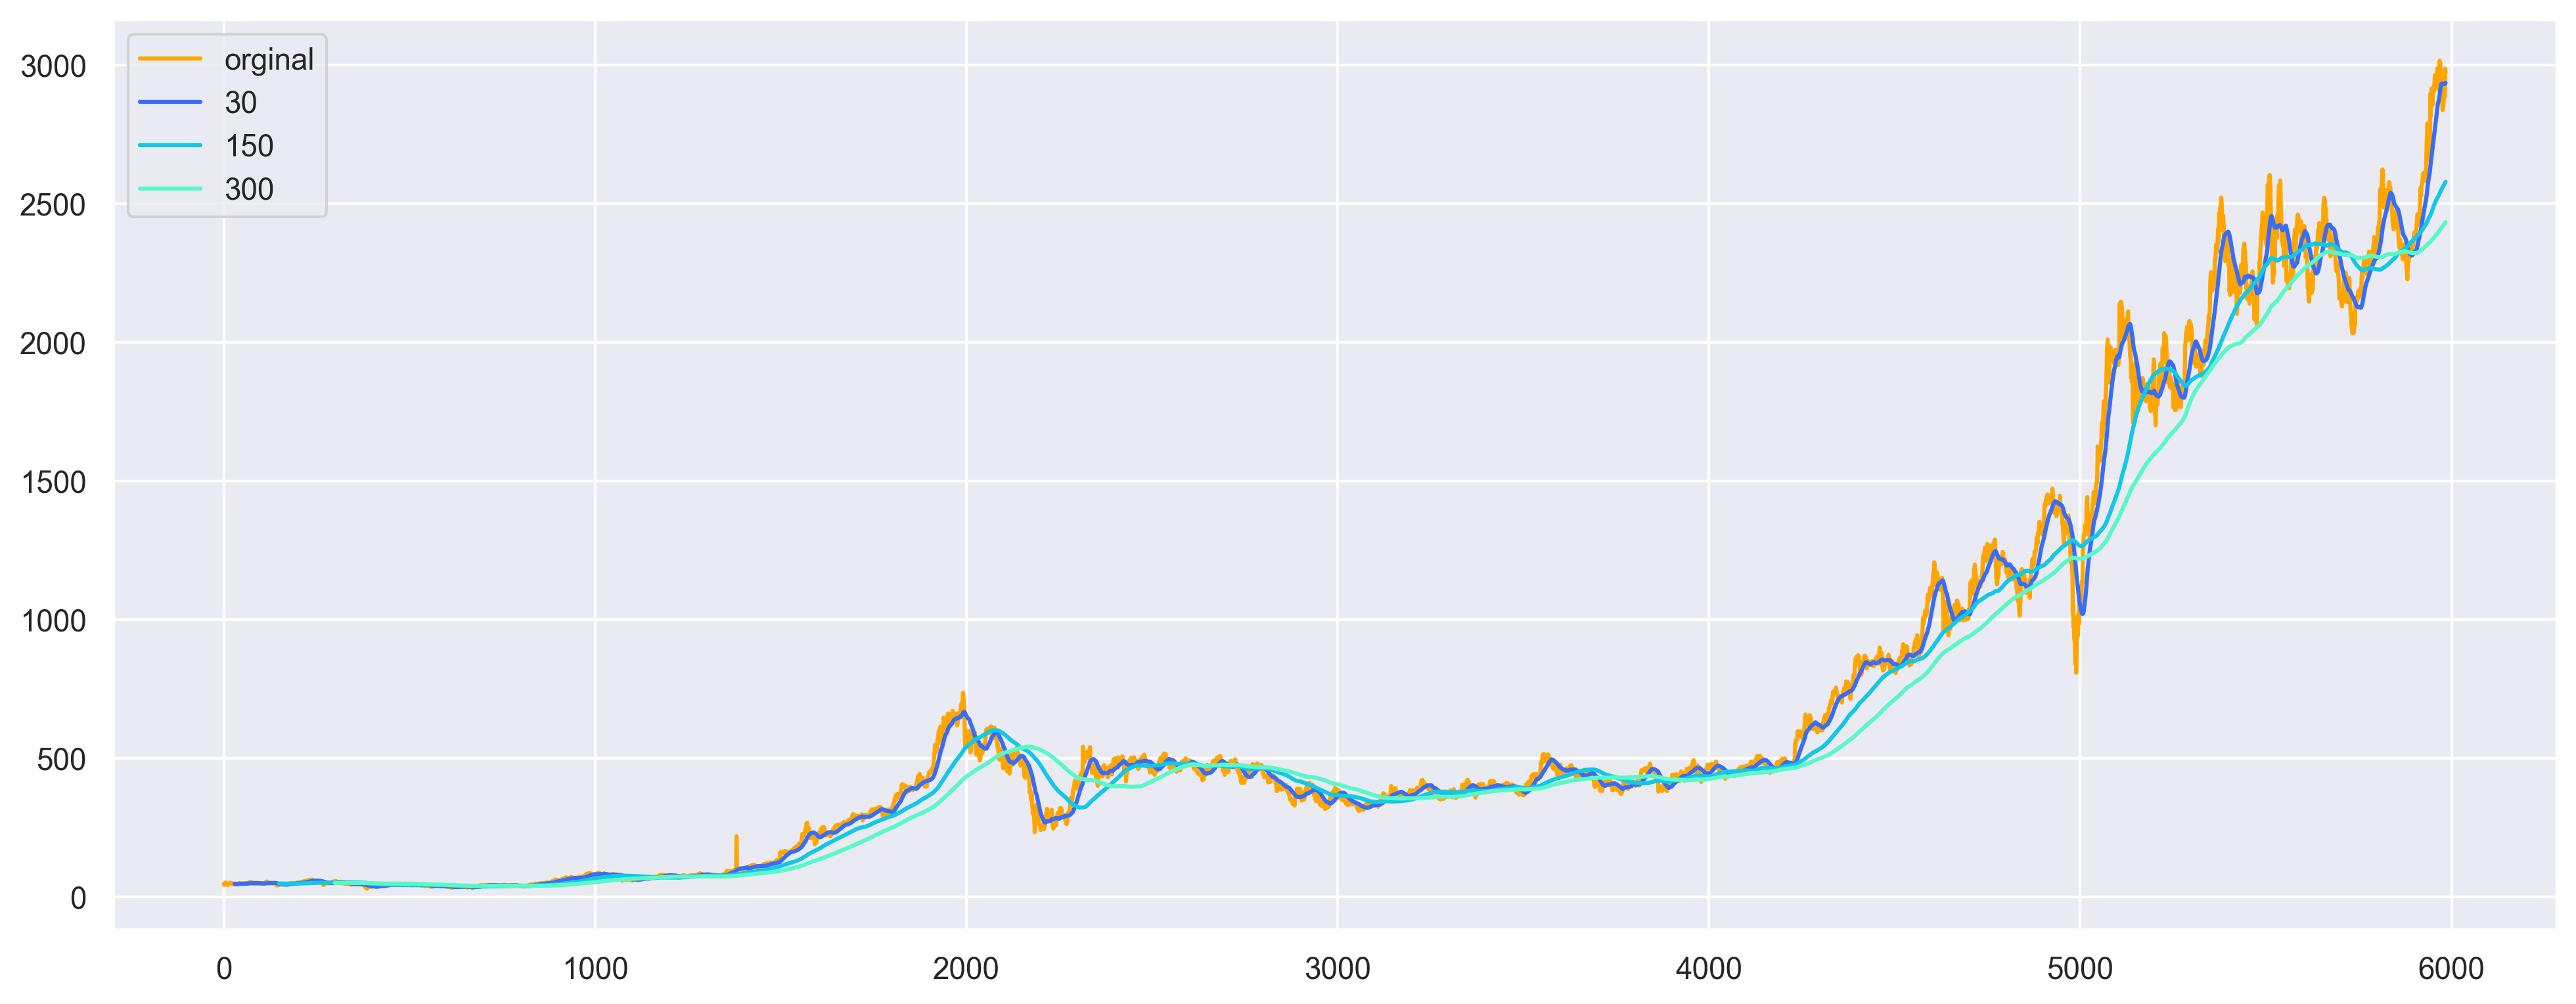

In [23]:
plt.figure(figsize = (16,6))
df_stock.Close.plot(label = "orginal",color = "orange")
ma = [30,150,300]
for i in ma:
    df_stock["Close"].rolling(i).mean().plot(label = str(i))
plt.legend()

> * <font color ="navy"> Moving Average with 30 window size removed noise data and shows smooth curve of signal data with short-term ups and downs. We can see there is downward trend during period of lockdown from March 2020 to May 2020. 
> * <font color ="navy"> Moving Average with 300 window size shows long term trend without seasonality, which is upward exponential trend.

* ##### <font color ='green'><u>DECOMPOSITION CHART</u> :

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 4800x3600 with 0 Axes>

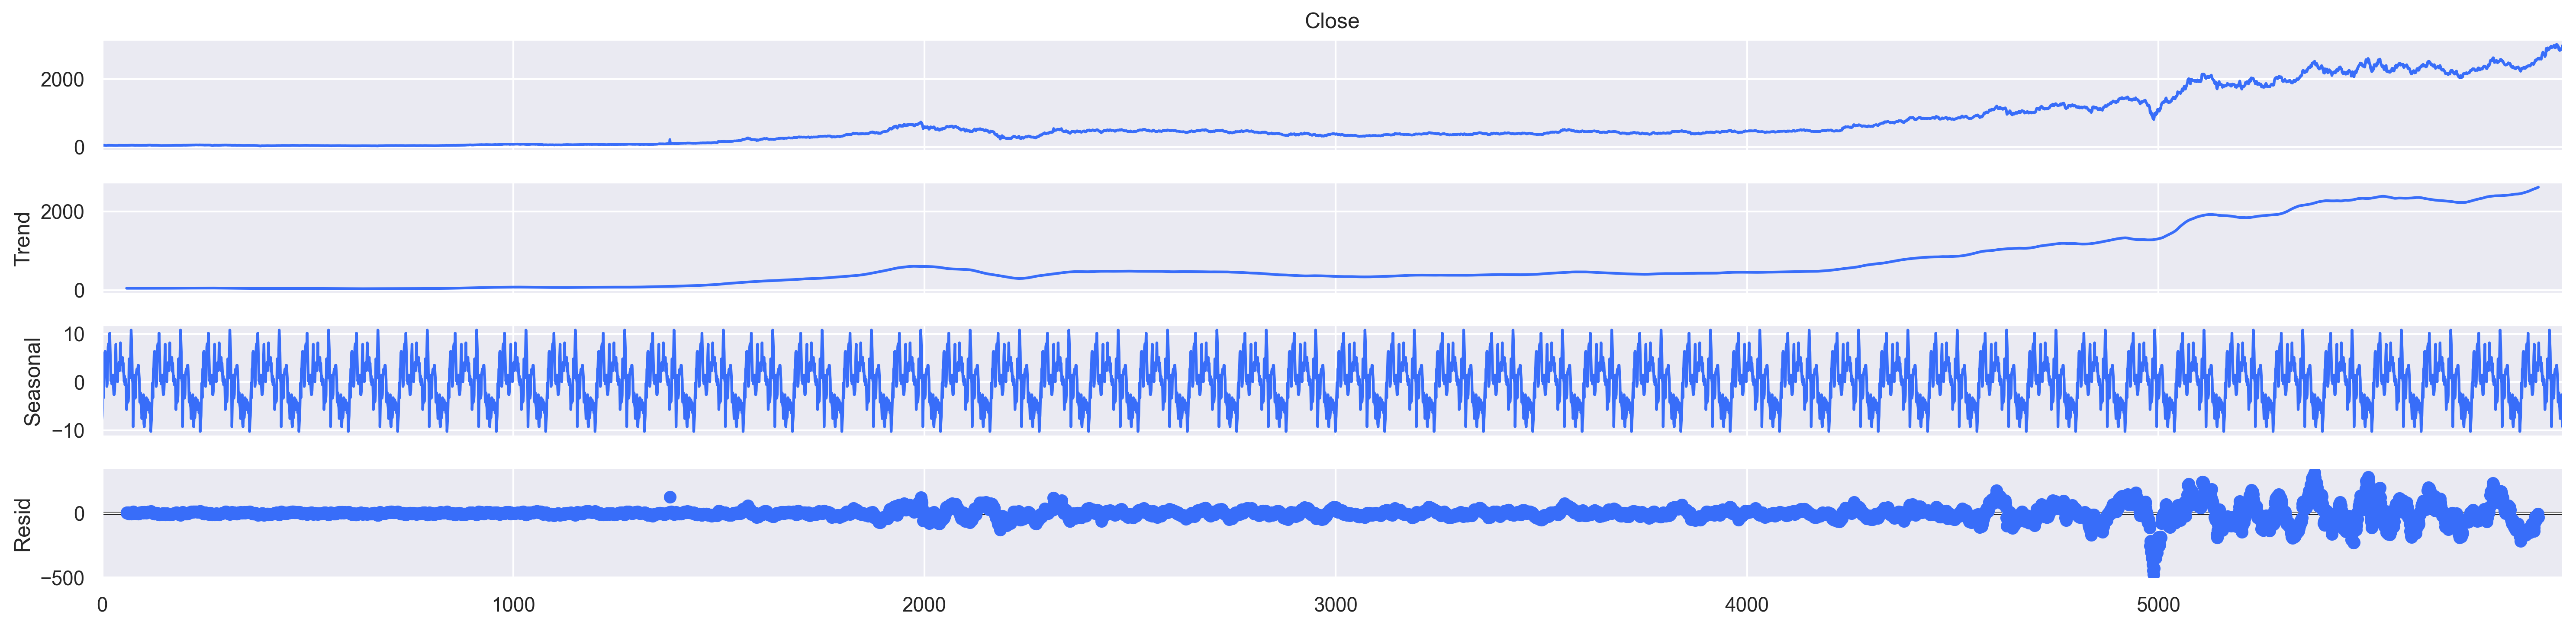

In [25]:
plt.figure(figsize = (16,12))
decomposition = sm.tsa.seasonal_decompose(df_stock['Close'], period=120)
plt.plot(decomposition)
plt.show()

> * <font color ="navy"> We observe overall upward trend, additive seasonality and in Residual Component we see the noise data and fluctuations majorly after 2020.

___

* ### <font color = 'candy'> <u> DATA PREPROCESSING  </u>

#### As we are going to predict the Close Price only so we will use only "Close" Variable for further model building.

In [26]:
# Choosing Only "Close" price in data-set :
df_c = df_stock.drop(columns = ['Open', 'High', 'Low', 'Volume'])
df_c = df_c.set_index('Date')
df_c.head(2)

Close
Date                 
2000-04-03  46.928082
2000-04-04  43.179264

### <font color = "green">➡ <u> Checking Stationarity </u> :

In [27]:
# To check Stationarity of Data we will perform Adfuller Test:
from statsmodels.tsa.stattools import adfuller

**Null hypothesis: Data is Non stationary**

**Alternate Hypothesis: Data is Stationary**
   
- If p < 0.05 ;  Reject Null Hypothesis. Data is stationary.

- if p > 0.05; Data is non stationary.

**According the p-value, the dataset is non stationary as the p value is greater than alpha value.**

In [28]:
p = adfuller(df_c['Close'])[1] # 1 - as second value of result is p-value.
if p < 0.05:
    print("p-value = ", round(p,3), " Data is Stationary.")
else:
    print("p-value = ", round(p,3), " Data is Non-stationary.")

p-value =  0.998  Data is Non-stationary.


In [29]:
# Differencing out to make Data Stationary:
df_st = df_c.copy()
df_st['stationary_close'] = df_st['Close'].diff()
df_st.head(3)

Close  stationary_close
Date                                   
2000-04-03  46.928082               NaN
2000-04-04  43.179264         -3.748818
2000-04-05  43.164982         -0.014282

In [30]:
# dropping null value
df_st.dropna(inplace= True)
df_st.shape

(5984, 2)

In [31]:
# Again Checking Stationarity:
p = adfuller(df_st['stationary_close'])[1] 
if p < 0.05:
    print("p-value = ", round(p,3), "\nData is Stationary.")
else:
    print("p-value = ", round(p,3), "\nData is Non-stationary.")

p-value =  0.0 
Data is Stationary.


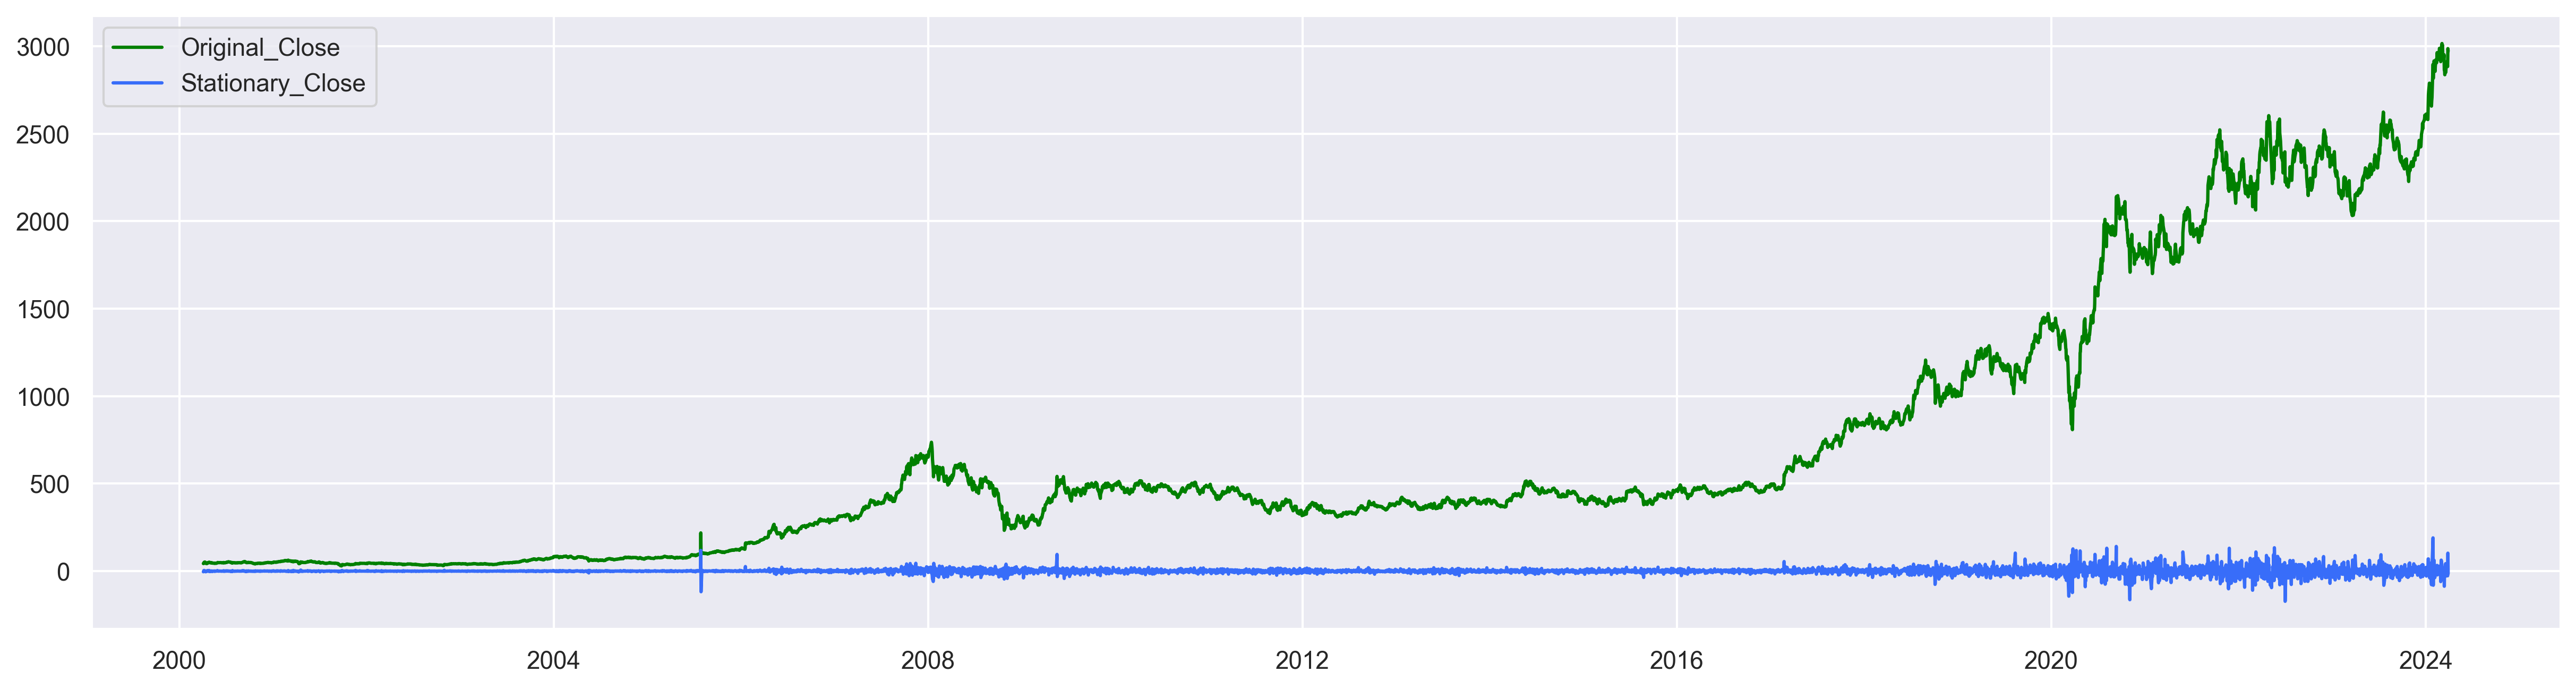

In [32]:
# Visualising Stationary Data and Original Data:
plt.plot(df_st['Close'], color = 'green', label='Original_Close')
plt.plot(df_st['stationary_close'], label='Stationary_Close')
plt.legend()

> * <font color ="navy"> We can observe the trend pattern is removed with first-order differencing. Now we got Stationary data which has constant statistical values throughout the period.

In [33]:
df_st.head(3)

Close  stationary_close
Date                                   
2000-04-04  43.179264         -3.748818
2000-04-05  43.164982         -0.014282
2000-04-06  46.578194          3.413212

In [34]:
# Differenced Data
df_st = df_st.drop(['Close'],axis=1)
df_st.head(3)

stationary_close
Date                        
2000-04-04         -3.748818
2000-04-05         -0.014282
2000-04-06          3.413212

> * <font color ="navy"> Now we have 2 datasets with us one is original(df_c) and another stationary(df_st). Let's Scale the both datasets.

### <font color = "green">➡ <u> Feature Scaling </u> :

In [35]:
# For Original Data (df_c):
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_c = sc.fit_transform(df_c)
scaled_c

array([[0.0058363 ],
       [0.00458054],
       [0.00457576],
       ...,
       [0.95590046],
       [0.99025219],
       [0.98556253]])

In [36]:
# For Stationary Data (df_st):
scaled_st = sc.fit_transform(df_st)
scaled_st

array([[0.46566545],
       [0.47596747],
       [0.4854225 ],
       ...,
       [0.40180062],
       [0.75889956],
       [0.43738673]])

> * <font color ="navy"> Now We have 4 datasets :
>    1. Original(df_c)
>    2. Stationary (df_st)
>    3. Original Scaled (scaled_c)
>    4. Stationary Scaled (scaled_st)
> * <font color ="navy"> We will use these data-sets for Model building purpose and will check which one gives better forecasting.

### <font color = "green">➡ <u>Train Test Split :

#### We will choose last one year data for testing purpose (April 2023 to March 2024)

In [37]:
# Fetching Index Number of 3rd April 2023 as 1st and 2nd April had weekend.
df_stock[df_stock['Date'] == "2023-04-03"]

Date         Open         High          Low       Close     Volume
5742 2023-04-03  2164.434326  2168.126221  2136.744141  2151.92749  5146521.0

In [38]:
print('Total number of Records = ', len(df_c))
print('Number of Records till March 2023 = ', len(df_c.head(5742)))
print('Number of Records in last year = ', len(df_c) - len(df_c.head(5742)))

Total number of Records =  5985
Number of Records till March 2023 =  5742
Number of Records in last year =  243


In [39]:
# Train Test Split for Original data:
train_c = df_c.head(5742)
test_c = df_c.tail(243)
print(len(train_c))
print(len(test_c))

5742
243


In [40]:
# Train Test Split for Original Scaled:
train_sc_c, test_sc_c = scaled_c[0:5742,:], scaled_c[5742:,:]
print(len(train_sc_c))
print(len(test_sc_c))

5742
243


In [41]:
# Train Test Split for Stationary data:
train_st = df_st.head(5741) 
test_st = df_st.tail(243)
print(len(train_st))
print(len(test_st))

5741
243


In [42]:
# Train Test Split for Differenced scaled Data:
train_sc_st, test_sc_st = scaled_st[0:5741,:], scaled_st[5741:,:]
print(len(train_sc_st))
print(len(test_sc_st))

5741
243


### <font color = "green">➡ <u> Creating Variables for Deterministic Models</u> :

In [43]:
# Variables for Deterministic Models: (t, t2, log_y)
df_t = df_c.copy()
df_t['t'] = range(1,len(df_t) + 1) 
df_t['t_square'] = df_t['t'] ** 2
df_t['log_Close'] = np.log(df_t['Close'])
df_t.head()

Close  t  t_square  log_Close
Date                                         
2000-04-03  46.928082  1         1   3.848616
2000-04-04  43.179264  2         4   3.765360
2000-04-05  43.164982  3         9   3.765030
2000-04-06  46.578194  4        16   3.841132
2000-04-07  50.305592  5        25   3.918116

In [44]:
# Train Test Split for Deterministic Model:
train_t = df_t.head(5742)
test_t = df_t.tail(243)
print(len(train_t))
print(len(test_t))

5742
243


___

* ### <font color = 'candy'> <u> MODEL BUILDING & EVALUATION 

* ### <font color = 'Navy'> <u> Deterministic Models :
  These trend-based models are based on simple equations like linear, exponential, and quadratic, especially used when the data exhibits a clear trend or pattern that can be described by these equations. We can see the <b> Exponential Trend</b> in our dataset. So let's check how these models works.
  
  Here we will use the Data we specially created for Deterministic model i.e., (df_t).
  

### <font color = "green">1. LINEAR MODEL:

In [45]:
import statsmodels.formula.api as smf

In [46]:
# Evaluation matrix:
from sklearn.metrics import mean_squared_error

In [47]:
linear_model = smf.ols('Close~t', data = train_t).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test_t)))
rmse_linear = np.sqrt(mean_squared_error(test_t['Close'], pred_linear))
print('RMSE Value for Linear Model = ',rmse_linear)

RMSE Value for Linear Model =  935.7999882535149


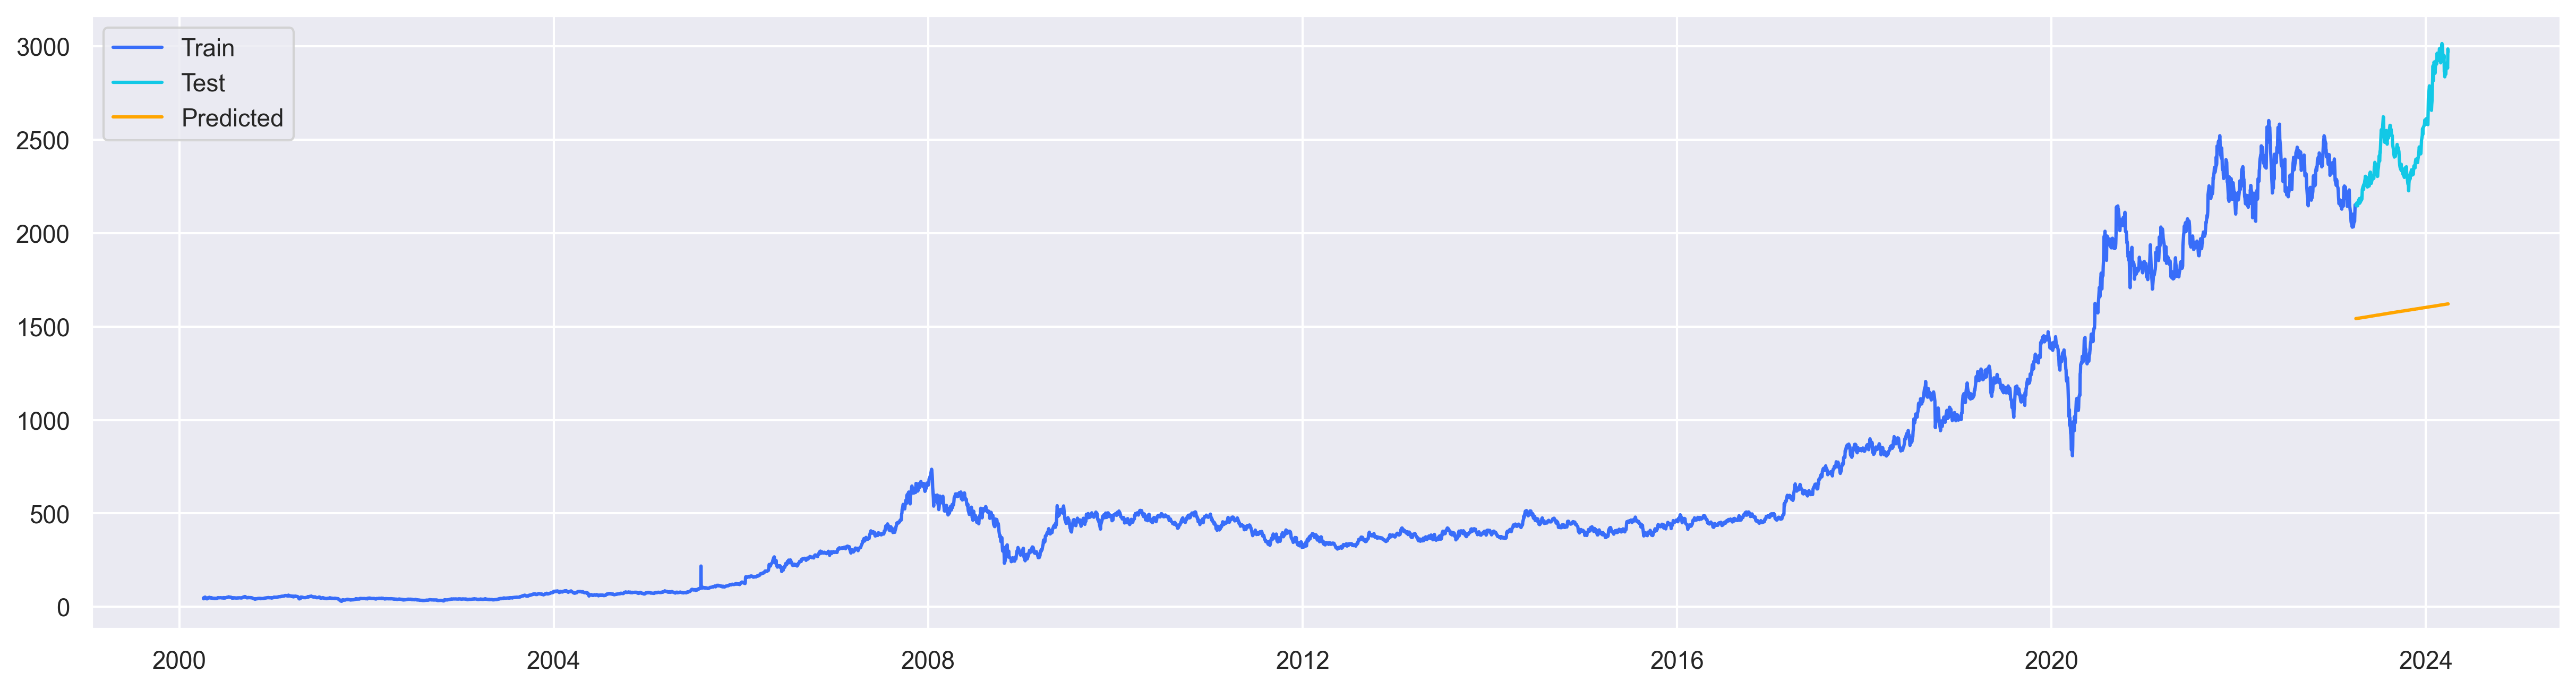

In [48]:
plt.plot(train_t['Close'], label = 'Train')
plt.plot(test_t['Close'], label = 'Test')
plt.plot(pred_linear, label = 'Predicted', color = 'orange')
plt.legend()

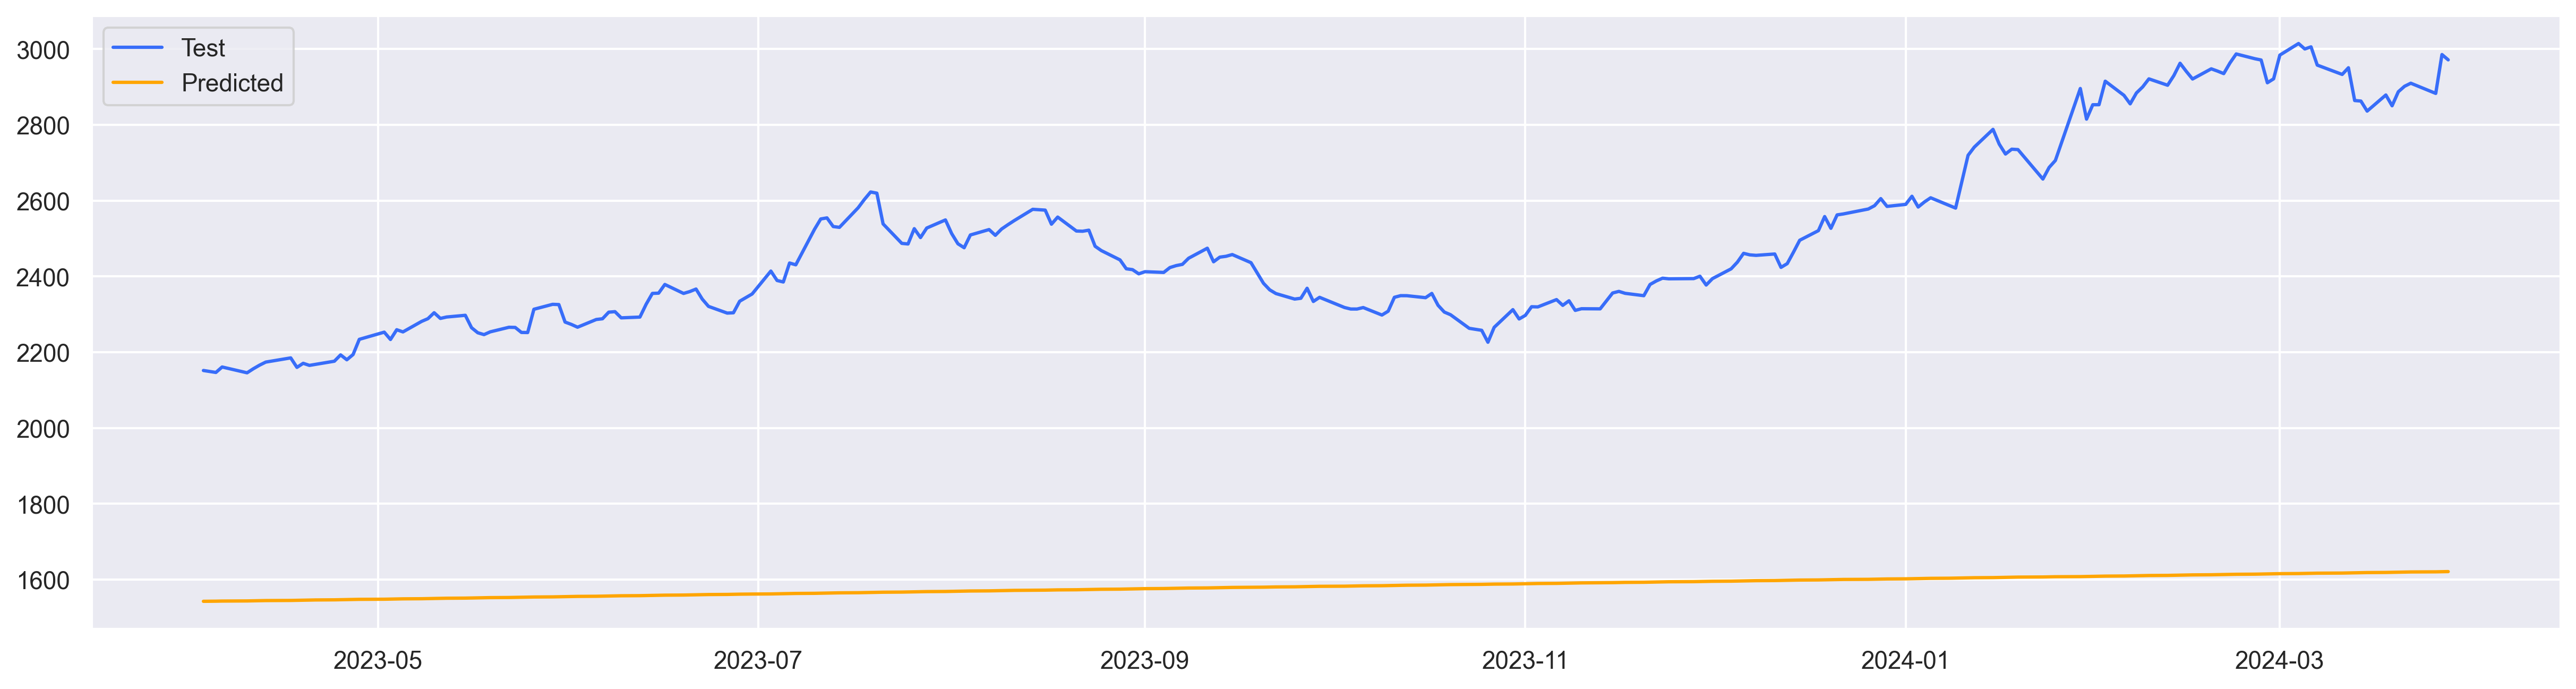

In [49]:
plt.plot(test_t['Close'], label = 'Test')
plt.plot(pred_linear, label = 'Predicted', color = 'orange')
plt.legend()

<br>

### <font color = "green">2. EXPONENTIAL MODEL:

In [50]:
exponential_model = smf.ols('log_Close~t', data = train_t).fit()
pred_exp = pd.Series(exponential_model.predict(pd.DataFrame(test_t['t'])))
pred_exp = np.exp(pred_exp) # Reverse of Log
rmse_exponential = np.sqrt(mean_squared_error(test_t['Close'],pred_exp))
print('RMSE Value for Exponential Model = ', rmse_exponential)

RMSE Value for Exponential Model =  192.22170497892964


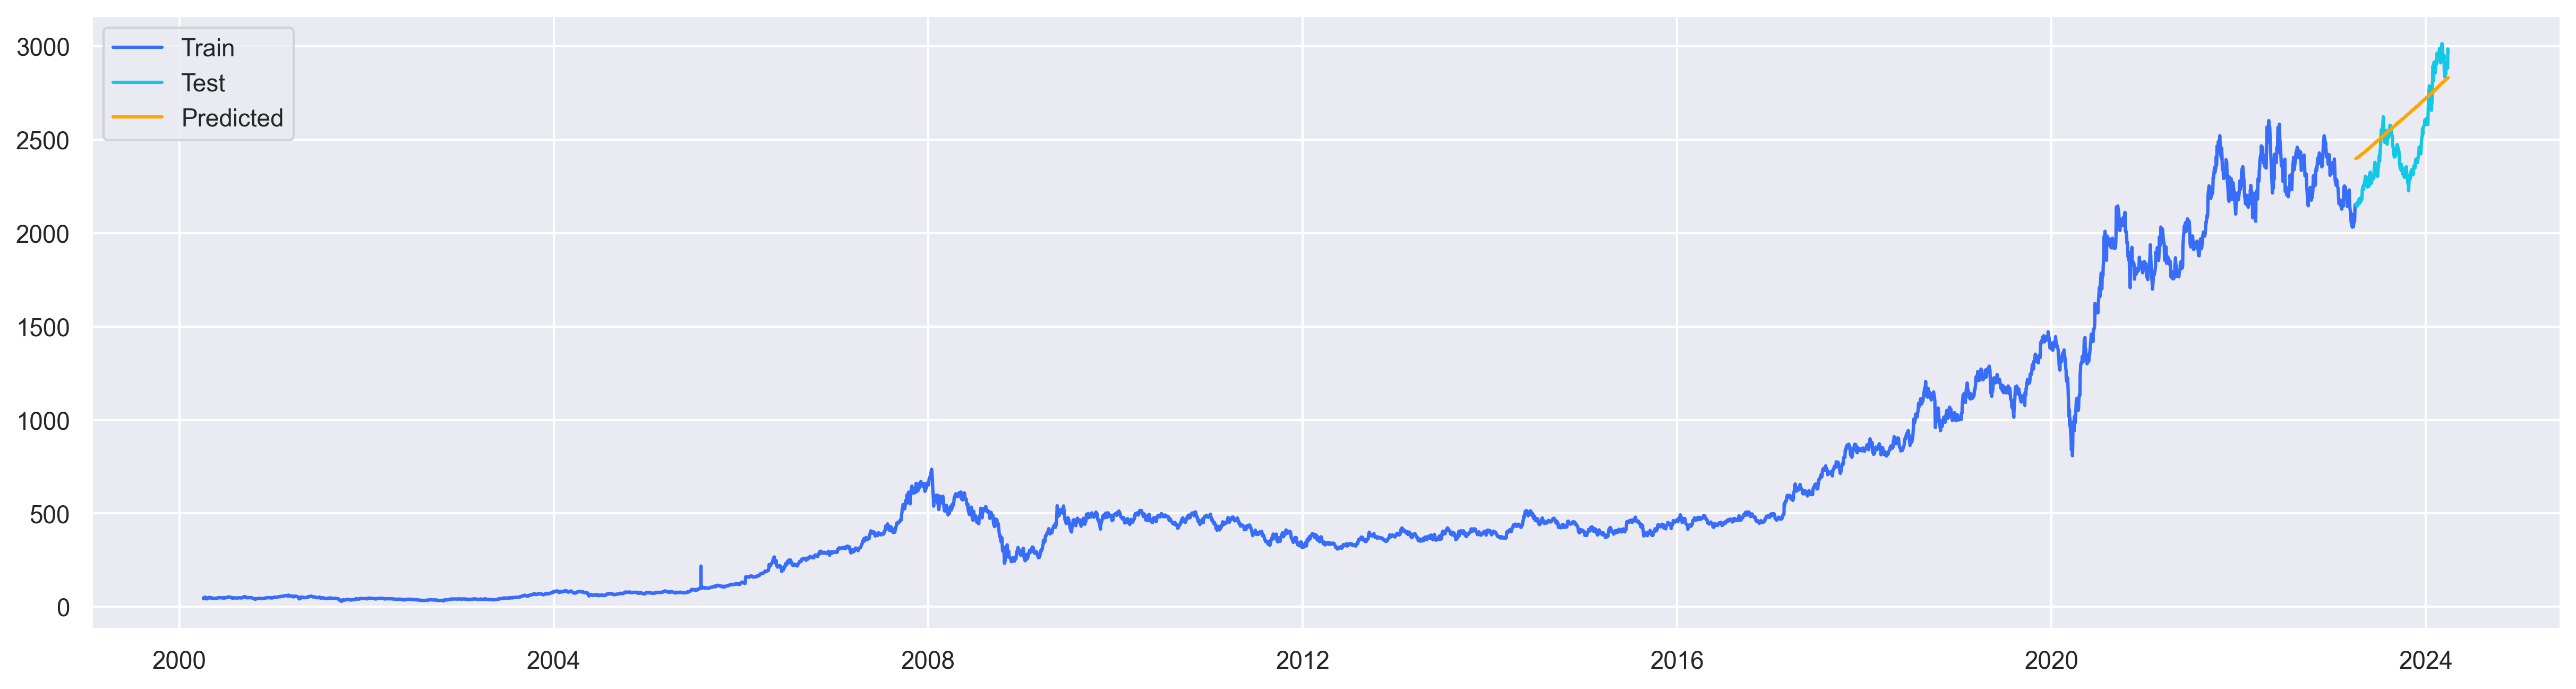

In [51]:
plt.plot(train_t['Close'], label = 'Train')
plt.plot(test_t['Close'], label = 'Test')
plt.plot(pred_exp, label = 'Predicted', color = 'orange')
plt.legend()

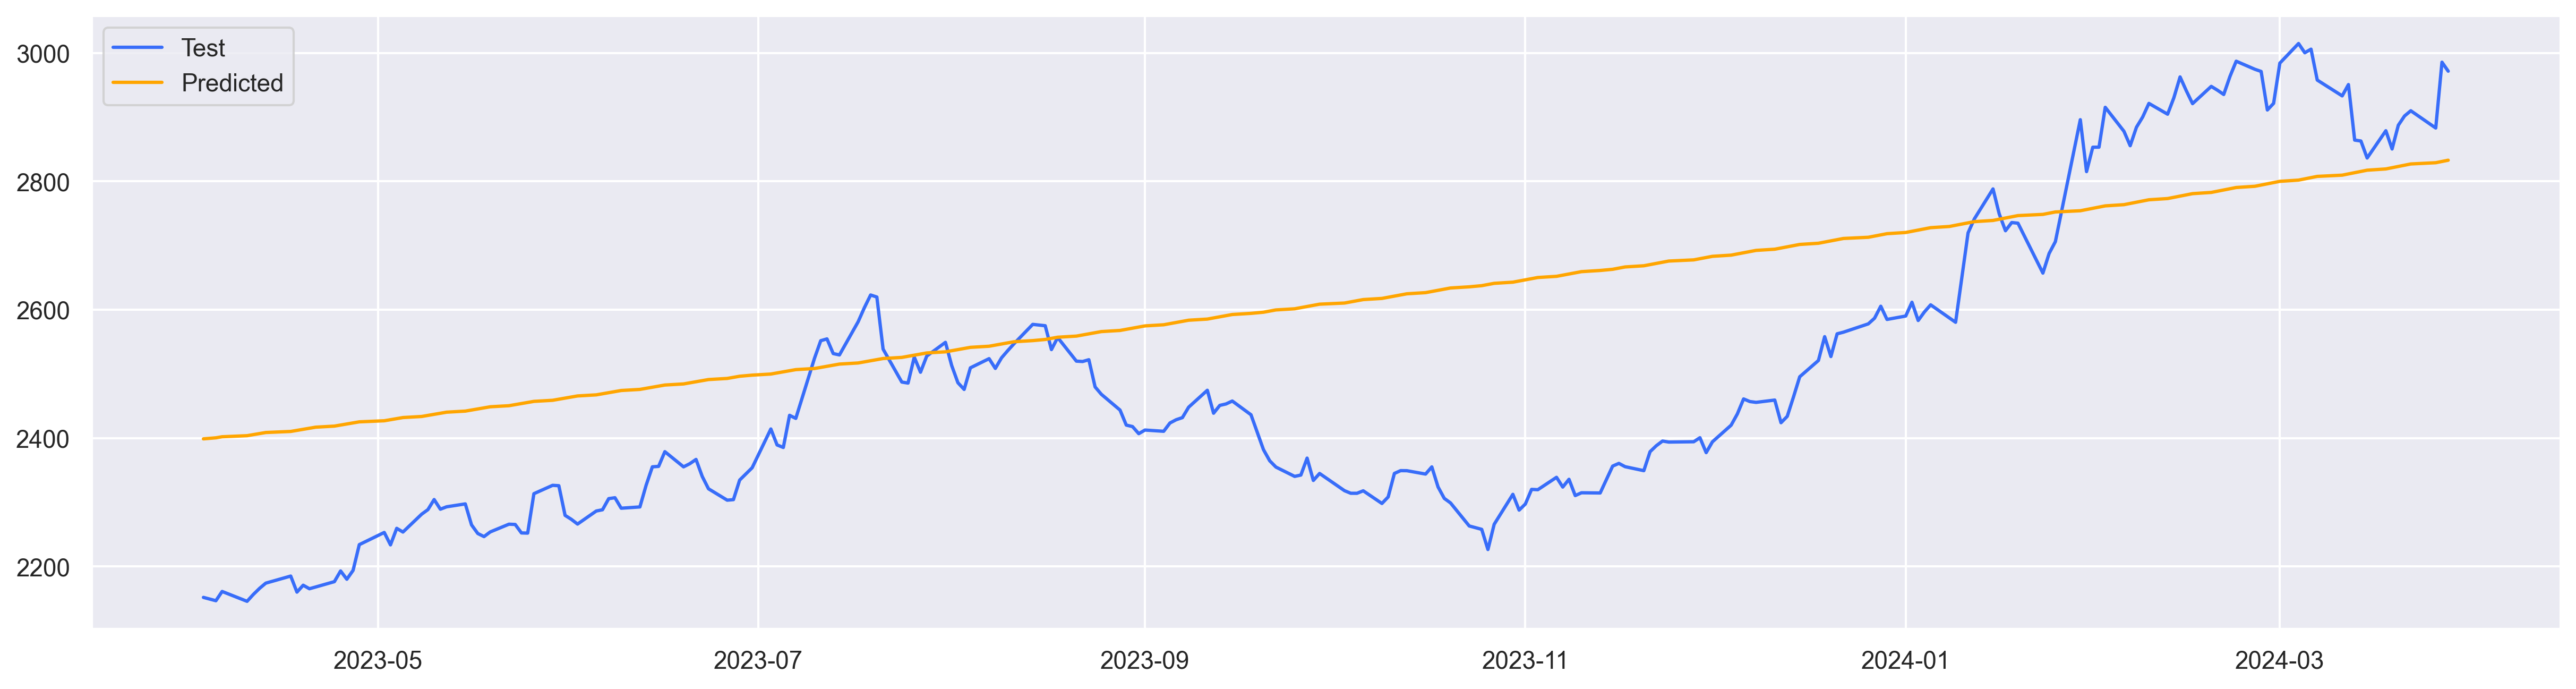

In [52]:
plt.plot(test_t['Close'], label = 'Test')
plt.plot(pred_exp, label = 'Predicted', color = 'orange')
plt.legend()

> * <font color ="navy"> As we know our Data follows exponential trend, the Exponential Model works will with comparatively low RMSE value than Linear Model.

<br>

### <font color = "green">3. QUADRATIC MODEL:

In [53]:
quadratic = smf.ols('Close~t+t_square', data = train_t).fit()
pred_quad = pd.Series(quadratic.predict(test_t[['t','t_square']]))
rmse_quadratic = np.sqrt(mean_squared_error(test_t['Close'],pred_quad))
print('RMSE Value for Quadratic Model = ', rmse_quadratic)

RMSE Value for Quadratic Model =  301.8122548053085


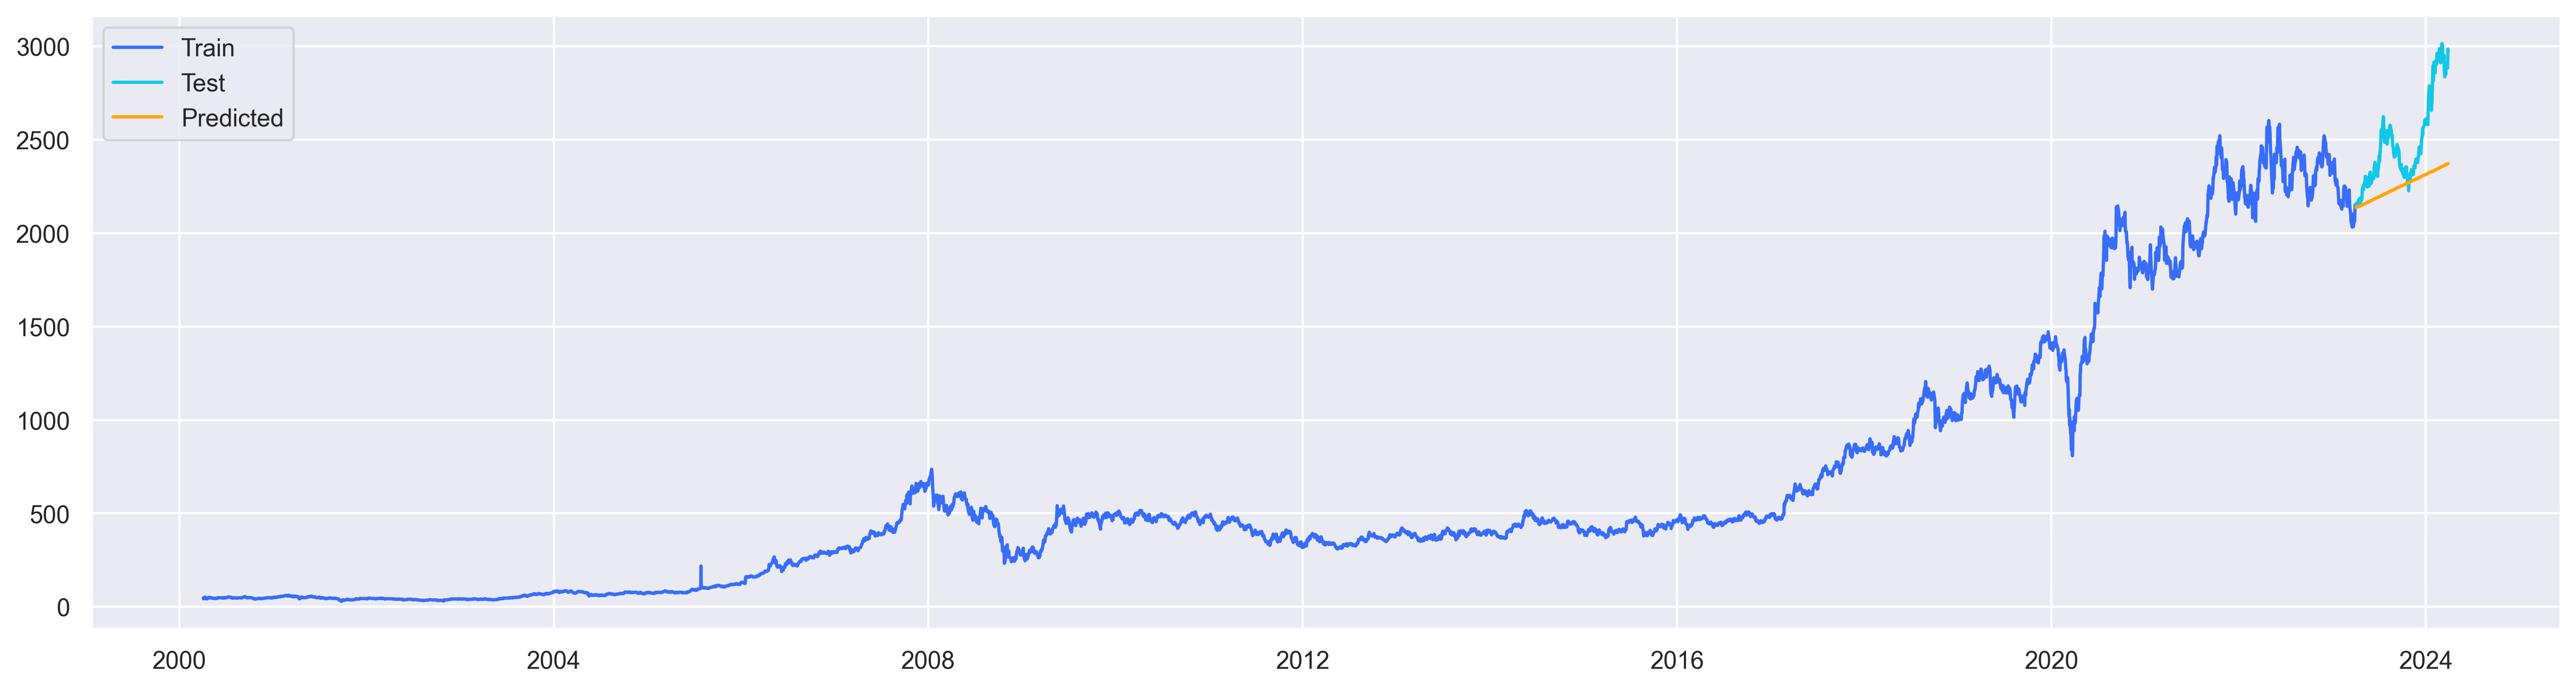

In [54]:
plt.plot(train_t['Close'], label = 'Train')
plt.plot(test_t['Close'], label = 'Test')
plt.plot(pred_quad, label = 'Predicted', color = 'orange')
plt.legend()

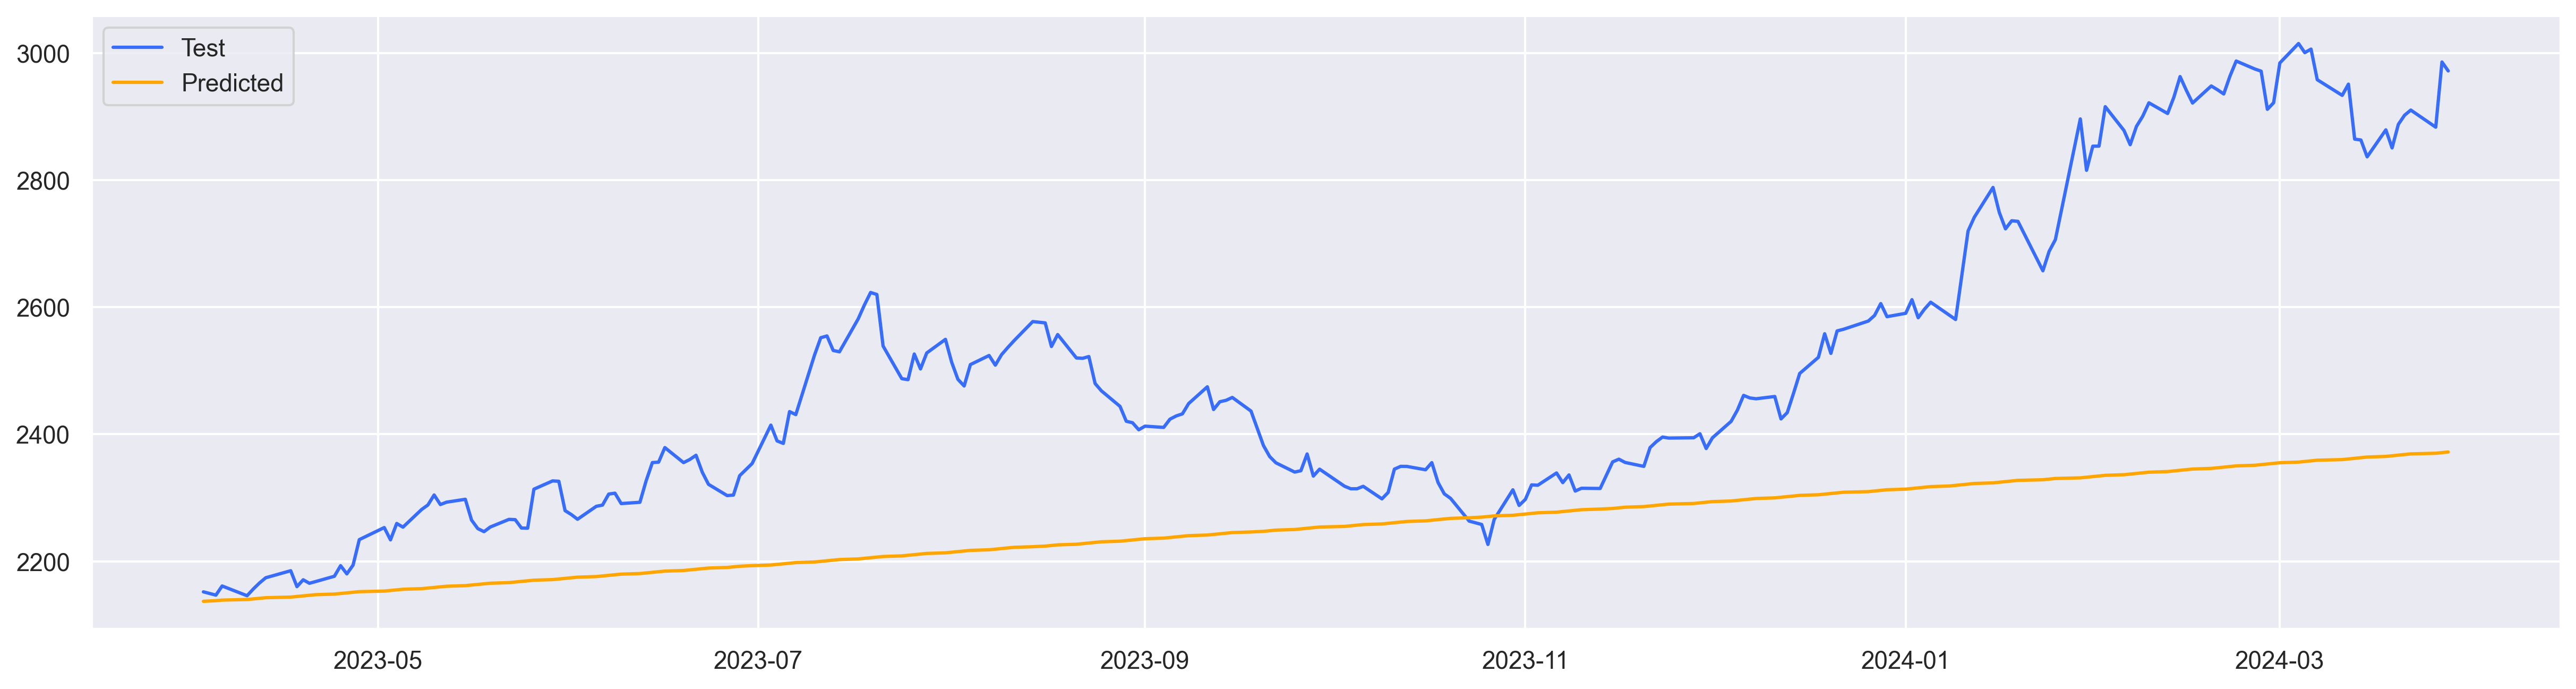

In [55]:
plt.plot(test_t['Close'], label = 'Test')
plt.plot(pred_quad, label = 'Predicted', color = 'orange')
plt.legend()

<br>
<br>

* ### <font color = 'Navy'> <u> Time Series Models:
  Time series models is used to analyze and forecast <b>sequential data</b> points collected over time. It captures the inherent dependencies and patterns within the data, enabling the prediction of future values based on past observations.

  <b>ARIMA</b> (AutoRegressive Integrated Moving Average) is a popular time series forecasting method that models the next value in a series based on its own <b>past values and past forecast errors</b>. It combines autoregression (AR), differencing (I), and moving average (MA) components to capture different aspects of a time series' behavior, making it suitable for modeling and predicting time-dependent data.

### <font color = "green">4. ARIMA MODEL:

In [56]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#### <font color = "magenta">4.1. ARIMA WITH ORIGINAL DATA

In [57]:
#find out order of arima 
order1 = auto_arima(df_c)
order1

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [94]:
arima1 = ARIMA(train_c, order=(5, 2, 0)).fit()
arima_pred1 = arima1.predict(start = 5743, end = 5985)
rmse_arima_original = np.sqrt(mean_squared_error(test_c, arima_pred1))
print("RMSE value for ARIMA model with Original Data is : ", rmse_arima_original)

RMSE value for ARIMA model with Original Data is :  2897.863871407115


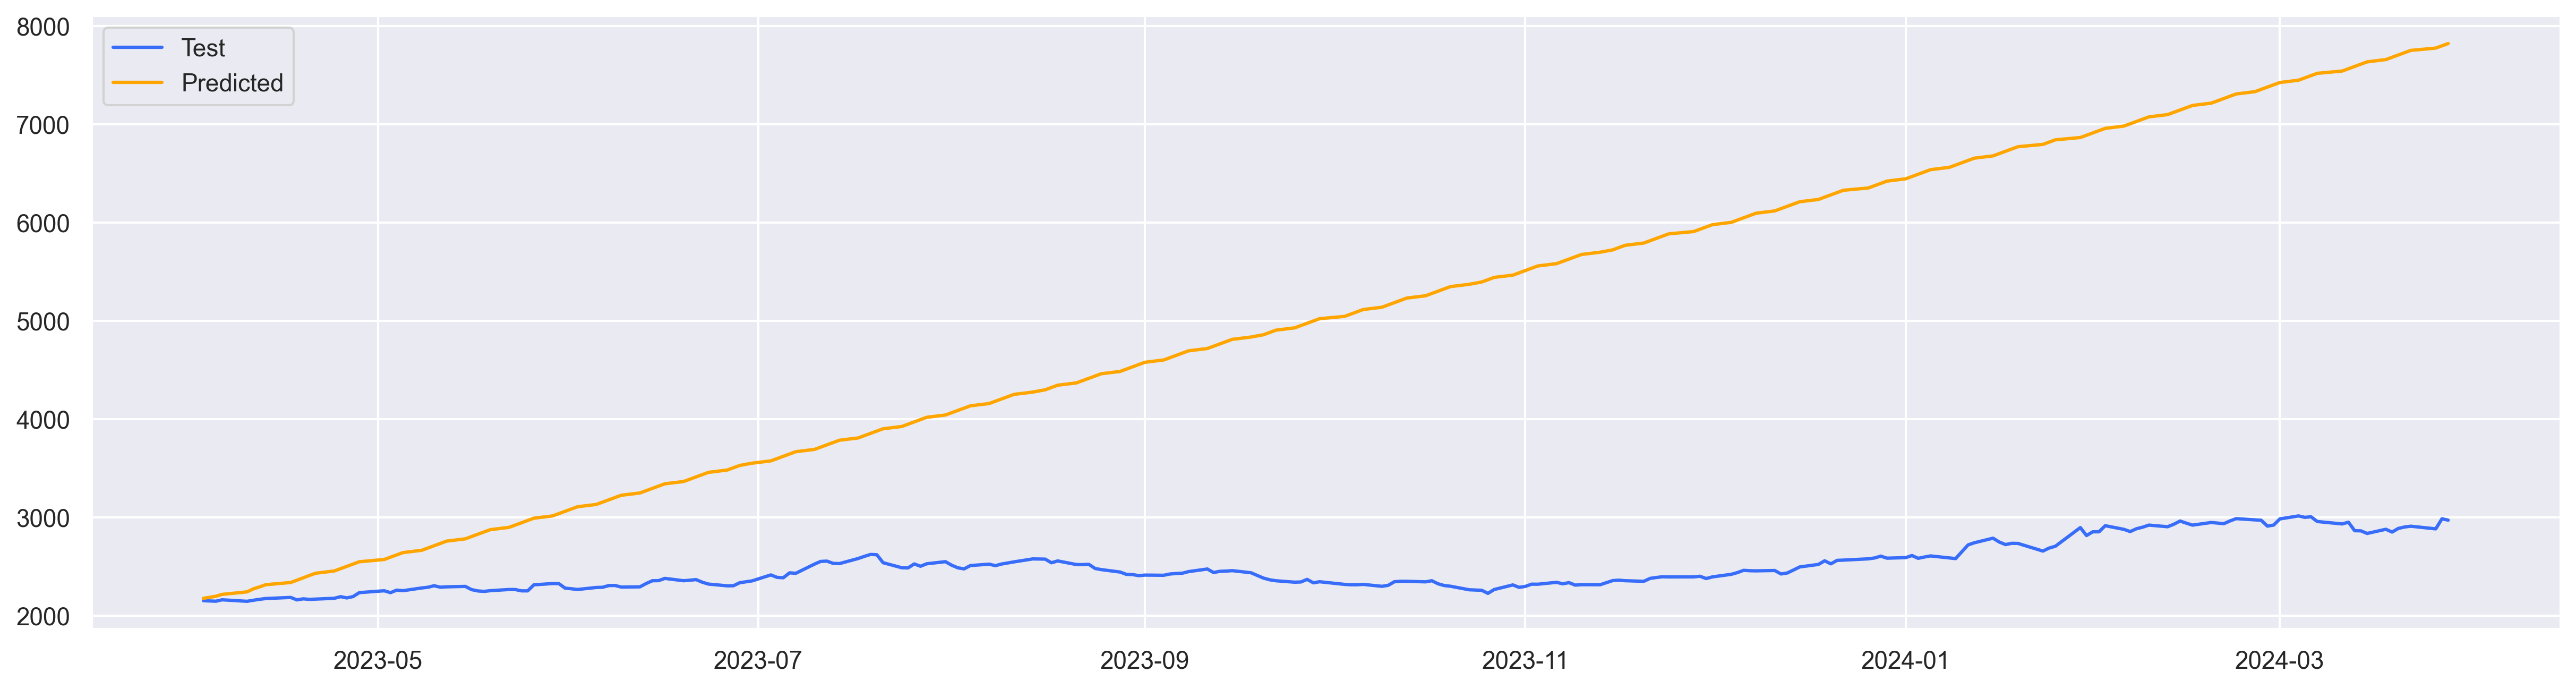

In [59]:
plot = test_c.copy().reset_index() 
ypred = pd.DataFrame(arima_pred1).reset_index(drop= True)
plot['Predicted'] = ypred
plt.plot(plot['Date'], plot['Close'],label = 'Test')
plt.plot(plot['Date'], plot['Predicted'], label = 'Predicted',color = 'orange')
plt.legend()

> * <font color ="navy"> Here we get high error let's try with Stationary Data.

<br>

#### <font color = "magenta">4.2. ARIMA WITH STATIONARY DATA

In [60]:
#find out order of arima 
order2 = auto_arima(df_st)
order2

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [95]:
arima2 = ARIMA(train_st, order=(5, 1, 0)).fit()
arima_pred2 = arima2.predict(start = 5742, end = 5984)

# Converting in original Scale:
last_original_value = df_c['Close'].iloc[-1]
arima_pred2 = np.cumsum(arima_pred2) + last_original_value

rmse_arima_stationary = np.sqrt(mean_squared_error(test_c, arima_pred2))
print("RMSE value for ARIMA model with Stationary Data is : ", rmse_arima_stationary)

RMSE value for ARIMA model with Stationary Data is :  3623.840400652006


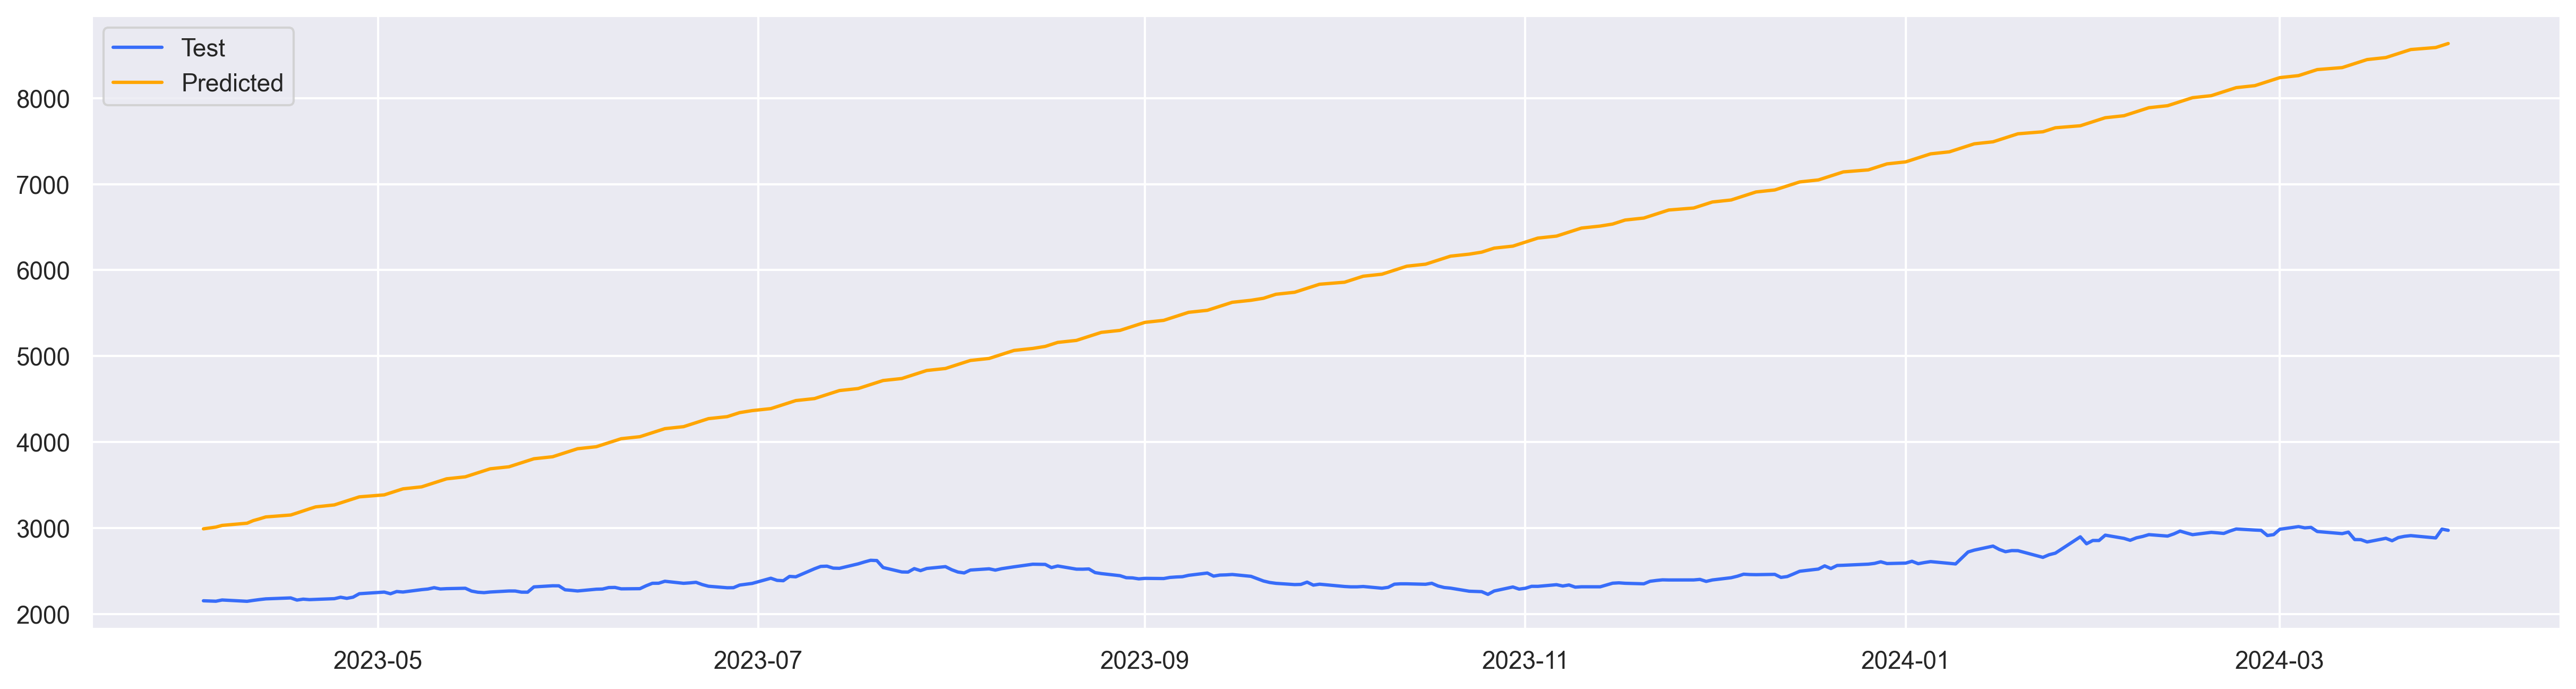

In [62]:
plot = test_c.copy().reset_index() 
ypred = pd.DataFrame(arima_pred2).reset_index(drop= True)
plot['Predicted'] = ypred
plt.plot(plot['Date'], plot['Close'],label = 'Test')
plt.plot(plot['Date'], plot['Predicted'], label = 'Predicted',color = 'orange')
plt.legend()

> * <font color ="navy"> We did not get satisfactory results. So Let's try with Scaled Stationary Data: 

<br>

#### <font color = "magenta">4.3. ARIMA WITH SCALED STATIONARY DATA

In [63]:
#find out order of arima 
order3 = auto_arima(scaled_st)
order3

ARIMA(order=(3, 1, 1), scoring_args={}, suppress_warnings=True)

In [96]:
arima3 = ARIMA(train_sc_st, order=(3, 1, 1)).fit()
arima_pred3 = arima3.forecast(steps = len(test_sc_st))

# Inverse Transform: 
arima_pred3 = sc.inverse_transform(arima_pred3.reshape(-1,1))

# Converting in original Scale:
arima_pred3 = np.cumsum(arima_pred3) + last_original_value

rmse_arima_stationary_sc = np.sqrt(mean_squared_error(test_c, arima_pred3))
print("RMSE value for ARIMA model with Scaled Stationary Data is : ", rmse_arima_stationary_sc)

RMSE value for ARIMA model with Scaled Stationary Data is :  583.1956402538273


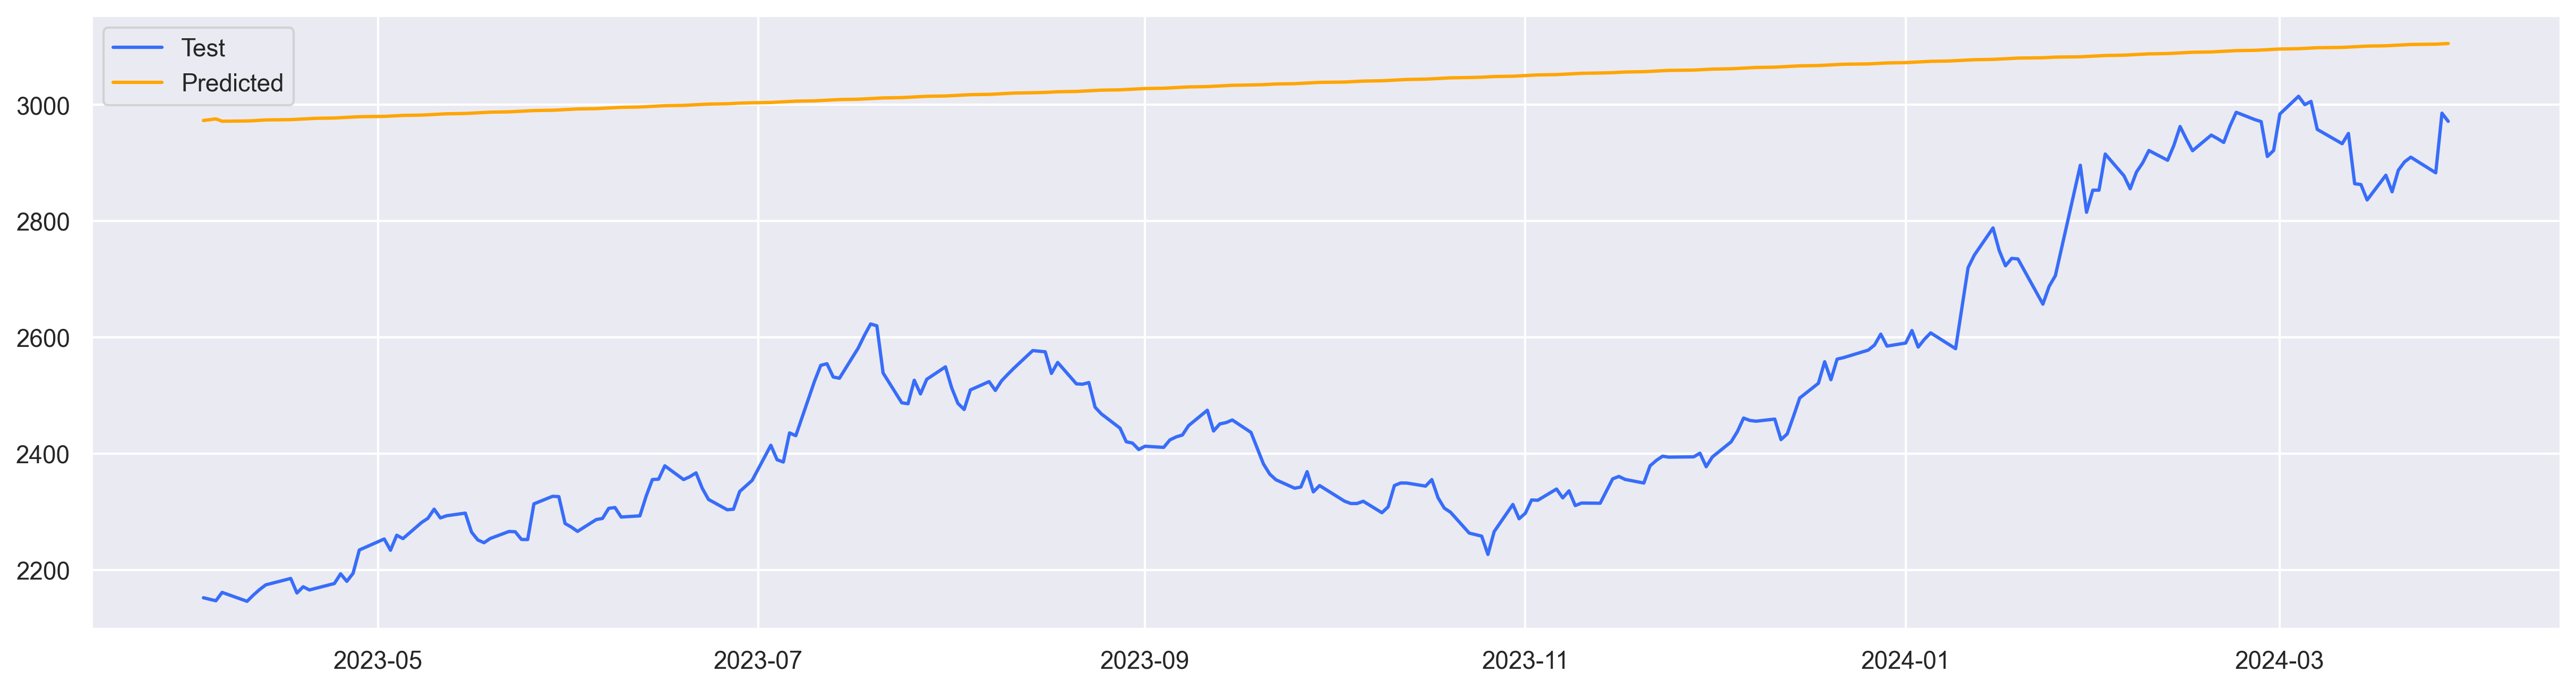

In [65]:
plot = test_c.copy().reset_index() 
ypred = pd.DataFrame(arima_pred3).reset_index(drop= True)
plot['Predicted'] = ypred
plt.plot(plot['Date'], plot['Close'], label = 'Test')
plt.plot(plot['Date'], plot['Predicted'], label = 'Predicted',color = 'orange')
plt.legend()

> * <font color ="navy"> Error got reduced with Scaled Stationary Data as compared to other ARIMA Models.

<br>

### <font color = "green">5. PROPHET MODEL:
* Prophet is an open-source time series forecasting tool developed by Facebook.
* It is based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
* Prophet handles missing data and outliers, and provides intuitive parameters for adjusting the forecast.

In [66]:
from prophet import Prophet

In [67]:
df1 = df_c.reset_index()
df1.head(2)

Date      Close
0 2000-04-03  46.928082
1 2000-04-04  43.179264

In [68]:
train_df1 = df1.head(5742)
test_df1 = df1.tail(243)
len(test_df1)

243

In [69]:
# Renaming columns as Prophet's requirements:
train_data = train_df1.rename(columns= {'Date': 'ds', 'Close': 'y'})

model = Prophet()
model.fit(train_data)

future = model.make_future_dataframe(periods = 243)  # Forecasting for the same length as the test data
forecast = model.predict(future)
forecast

19:32:09 - cmdstanpy - INFO - Chain [1] start processing
19:32:14 - cmdstanpy - INFO - Chain [1] done processing


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2000-04-03    46.177210   -94.916204   140.066061    46.177210   
1    2000-04-04    46.175819   -82.937166   144.575712    46.175819   
2    2000-04-05    46.174427   -78.878898   146.483999    46.174427   
3    2000-04-06    46.173035   -80.236832   139.951980    46.173035   
4    2000-04-07    46.171644   -75.687301   142.354942    46.171644   
...         ...          ...          ...          ...          ...   
5980 2023-11-25  2773.693961  2772.977909  3002.160932  2753.494438   
5981 2023-11-26  2774.629574  2569.610964  2807.966251  2754.346842   
5982 2023-11-27  2775.565186  2660.034140  2900.366751  2755.201355   
5983 2023-11-28  2776.500799  2677.455056  2907.098809  2756.067616   
5984 2023-11-29  2777.436411  2669.878894  2903.238305  2756.933877   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0       46.177210      -22.286941            -22.286941            -22.286941   
1       46.175819      -18.701573            -18.701573            -18.701573   
2       46.174427      -16.787368            -16.787368            -16.787368   
3       46.173035      -14.482581            -14.482581            -14.482581   
4       46.171644      -15.461428            -15.461428            -15.461428   
...           ...             ...                   ...                   ...   
5980  2789.834231      109.946757            109.946757            109.946757   
5981  2790.838032      -80.956297            -80.956297            -80.956297   
5982  2791.841832        9.366058              9.366058              9.366058   
5983  2792.872116       11.173878             11.173878             11.173878   
5984  2794.084522       11.327220             11.327220             11.327220   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
0     -2.104310     -2.104310     -2.104310 -20.182632    -20.182632   
1     -0.615001     -0.615001     -0.615001 -18.086572    -18.086572   
2     -0.736995     -0.736995     -0.736995 -16.050373    -16.050373   
3     -0.393505     -0.393505     -0.393505 -14.089076    -14.089076   
4     -3.245534     -3.245534     -3.245534 -12.215894    -12.215894   
...         ...           ...           ...        ...           ...   
5980  99.176775     99.176775     99.176775  10.769982     10.769982   
5981 -92.081430    -92.081430    -92.081430  11.125132     11.125132   
5982  -2.104310     -2.104310     -2.104310  11.470367     11.470367   
5983  -0.615001     -0.615001     -0.615001  11.788879     11.788879   
5984  -0.736995     -0.736995     -0.736995  12.064214     12.064214   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       -20.182632                   0.0                         0.0   
1       -18.086572                   0.0                         0.0   
2       -16.050373                   0.0                         0.0   
3       -14.089076                   0.0                         0.0   
4       -12.215894                   0.0                         0.0   
...            ...                   ...                         ...   
5980     10.769982                   0.0                         0.0   
5981     11.125132                   0.0                         0.0   
5982     11.470367                   0.0                         0.0   
5983     11.788879                   0.0                         0.0   
5984     12.064214                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0    23.890269  
1                            0.0    27.474246  
2                            0.0    29.387059  
3                            0.0    31.690454  
4                            0.0    30.710216  
...                          ...          ...  
5980                         0.0  2883.640718  
5981                         0.0  2693.673276  
5982                     

In [70]:
mse = mean_squared_error(test_df1['Close'], forecast['yhat'][-len(test_df1):])
rmse_prophet = np.sqrt(mse)
print("RMSE Value for Prophet Model = ", rmse_prophet)

RMSE Value for Prophet Model =  261.637908447002


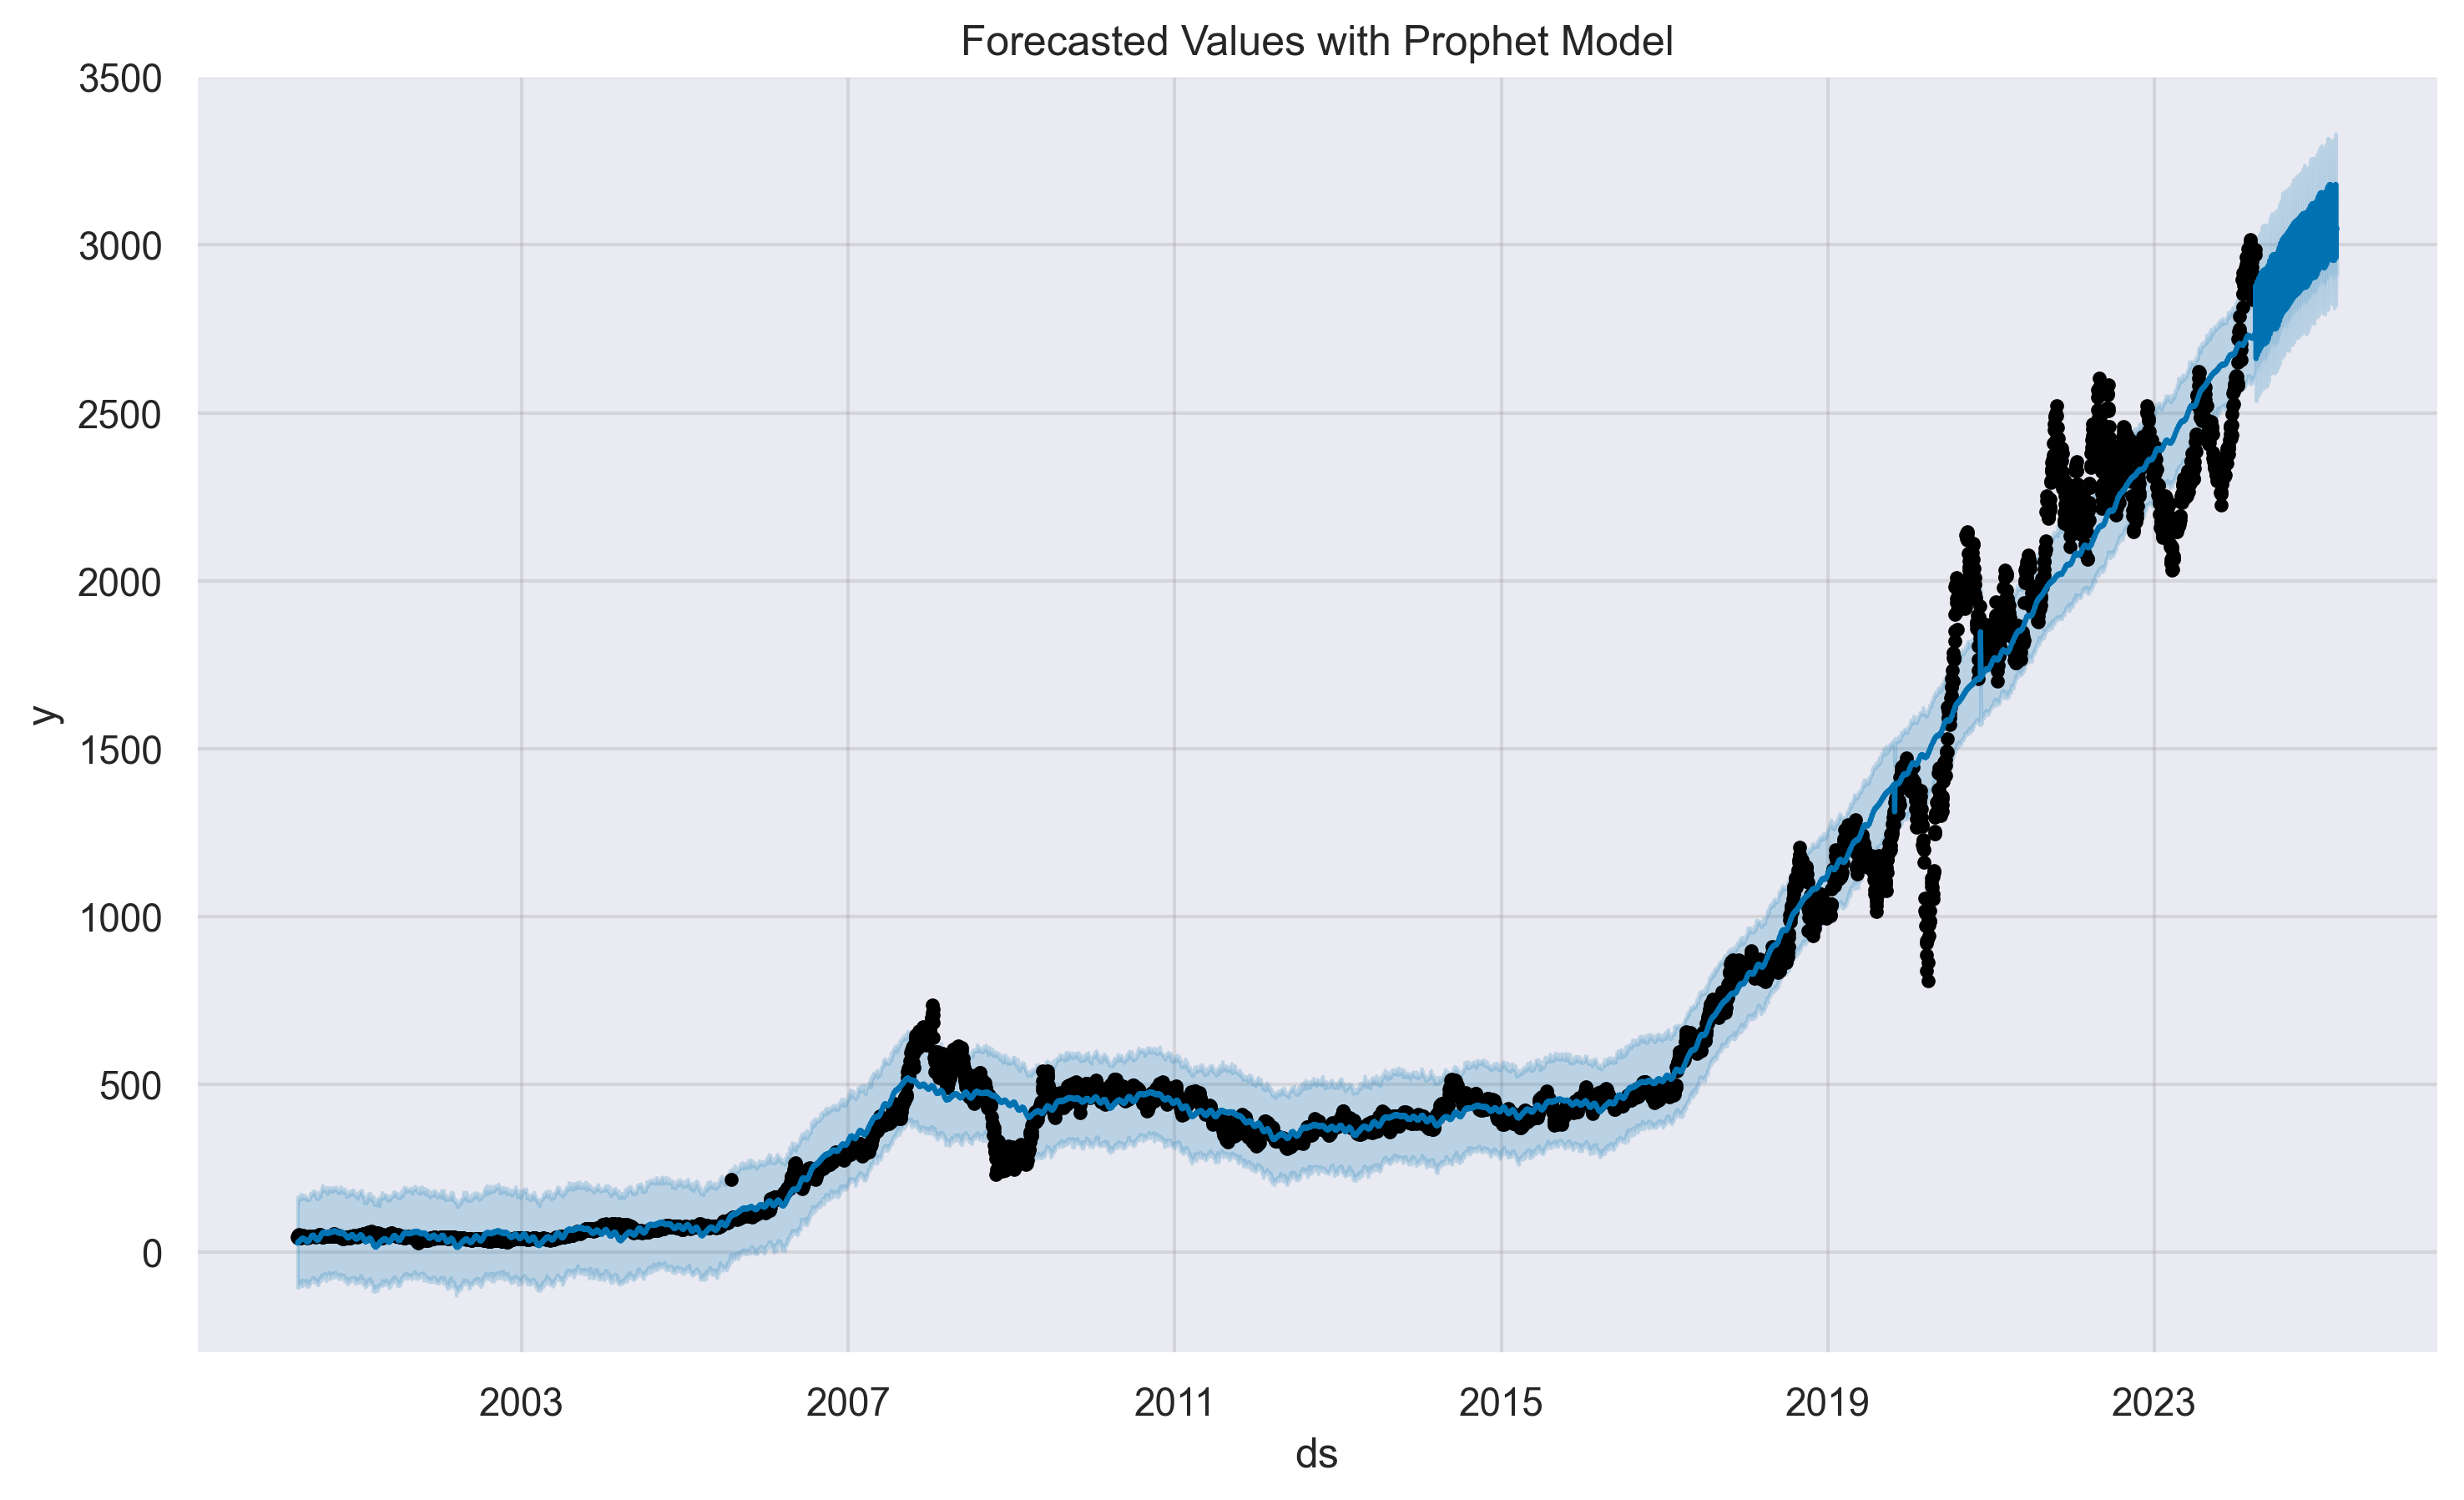

In [101]:
model.plot(forecast)
plt.title(" Forecasted Values with Prophet Model ")
plt.show()

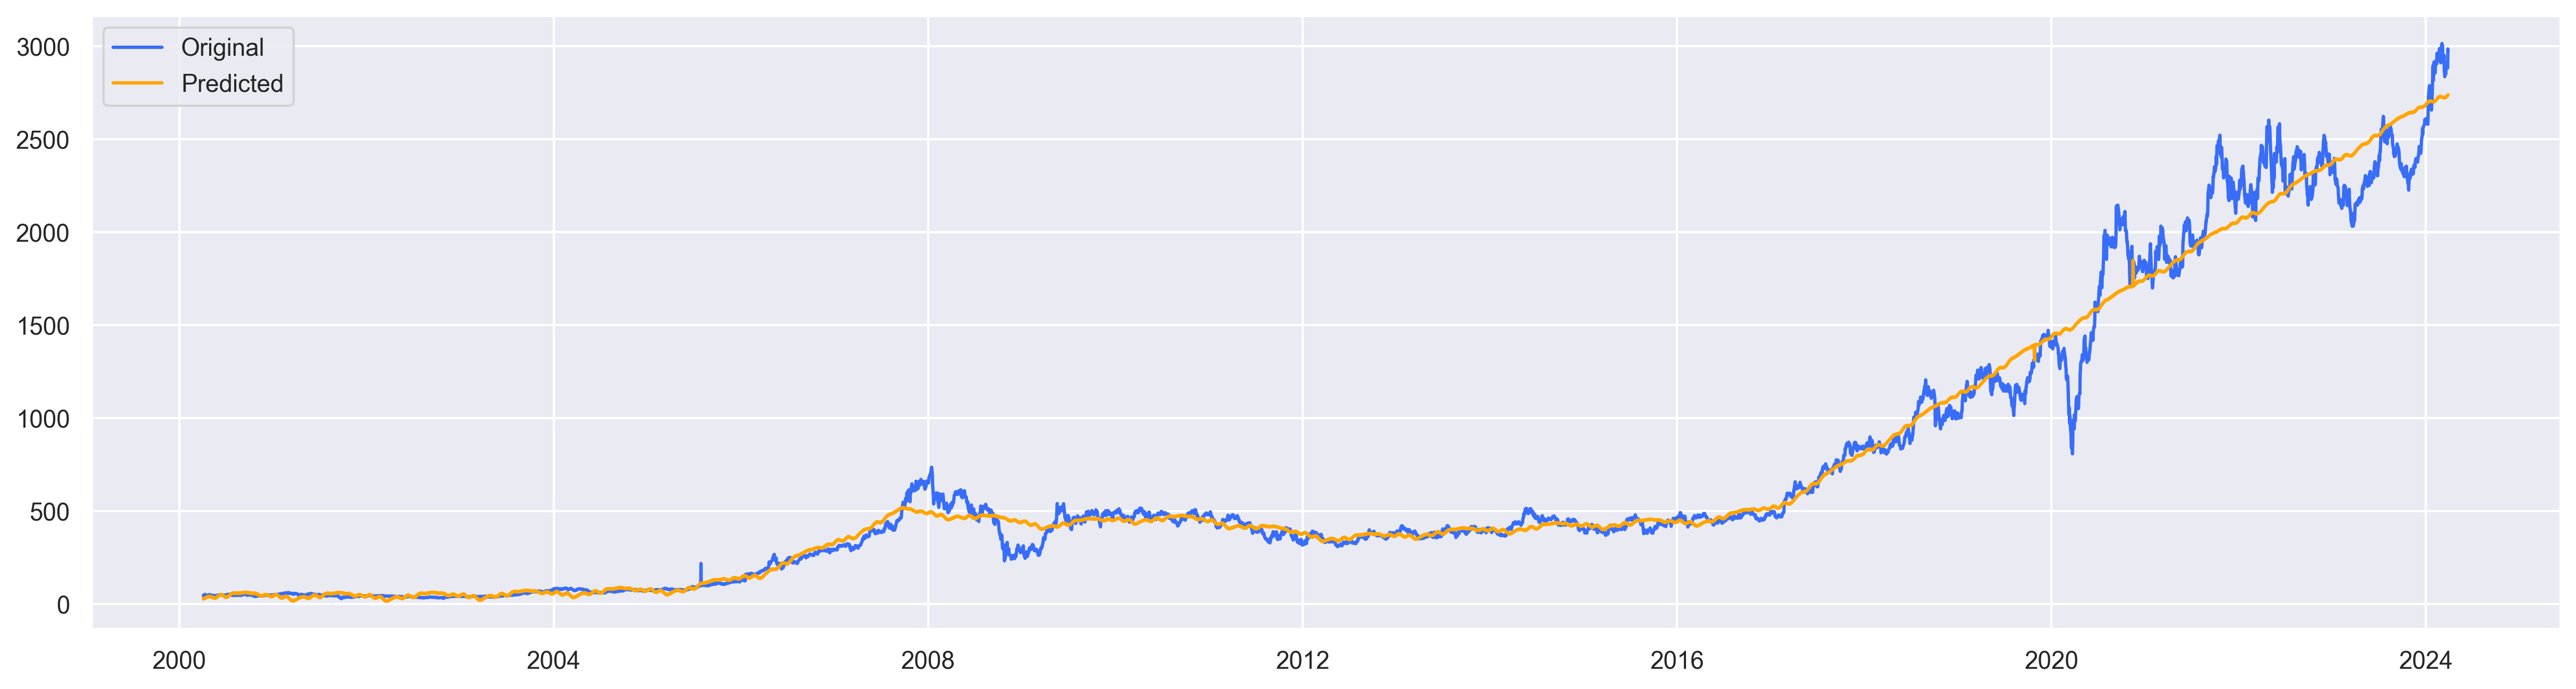

In [102]:
df1['yhat'] = forecast['yhat']
plt.plot(df1['Date'], df1['Close'], label = 'Original')
plt.plot(df1['Date'], df1['yhat'], color = 'orange', label = 'Predicted')
plt.legend()

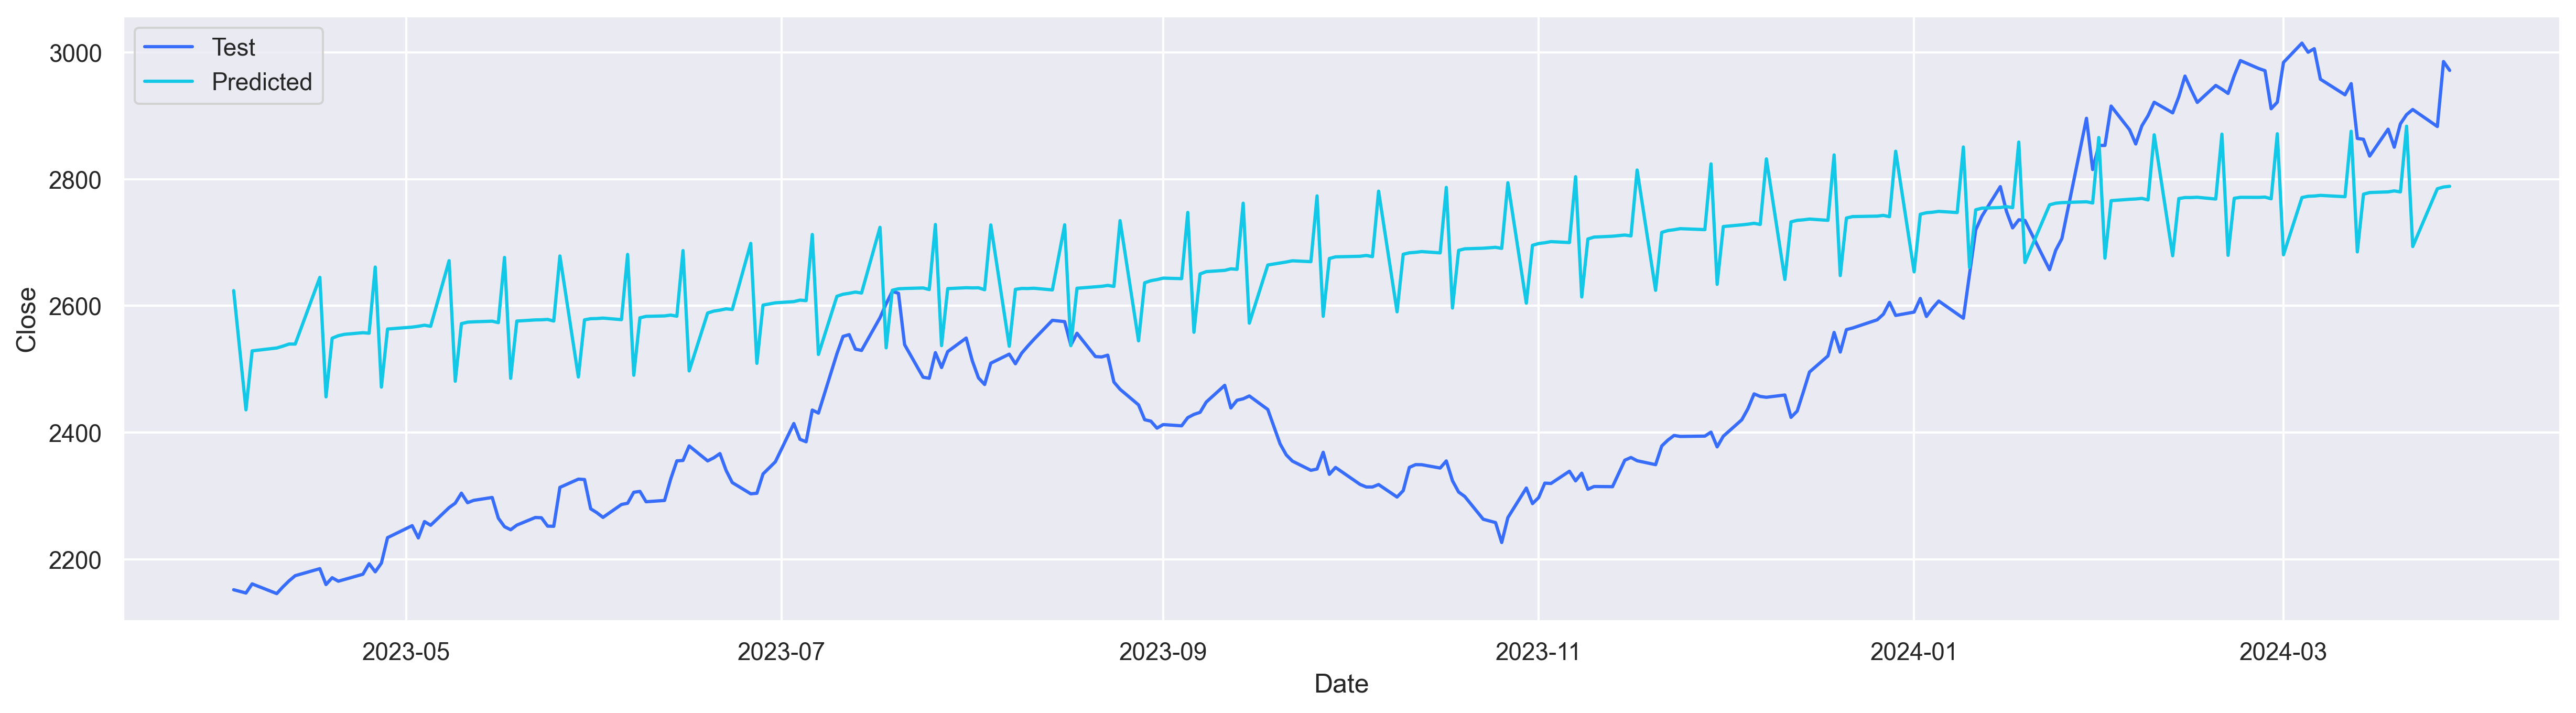

In [73]:
plot_prophet = df1.tail(243)
sns.lineplot(x = plot_prophet['Date'], y = plot_prophet['Close'], label = "Test")
sns.lineplot(x = plot_prophet['Date'], y = plot_prophet['yhat'], label = "Predicted")
plt.legend()

<br>
<br>

### <font color = "green">6. LSTM MODEL:
* Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to capture long-term dependencies in sequential data. 
* It incorporates a memory cell and a set of gates to selectively control the flow of information, allowing it to retain information over long sequences and mitigate the vanishing gradient problem.
* As it is RNN model we will use scaled data for analysis.

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [75]:
# convert an array of values into a dataset matrix :
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [76]:
len(train_sc_c), len(test_sc_c)

(5742, 243)

In [77]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(train_sc_c, time_step)
x_test, y_test = create_dataset(test_sc_c, time_step)
print("Training_Data_Shape:")
print(x_train.shape), print(y_train.shape)
print("Testing_Data_Shape:")
print(x_test.shape), print(y_test.shape)

Training_Data_Shape:
(5641, 100)
(5641,)
Testing_Data_Shape:
(142, 100)
(142,)


(None, None)

In [78]:
# Reshape input to be [samples, time steps, features] which is required for LSTM :
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)
len(x_train), len(x_test)

(5641, 142)

In [79]:
# Define the LSTM model
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 100, 32)           8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100

89/89 [==============================] - 31s 207ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 2/100
89/89 [==============================] - 16s 180ms/step - loss: 3.0179e-04 - val_loss: 0.0025
Epoch 3/100
89/89 [==============================] - 16s 176ms/step - loss: 2.8124e-04 - val_loss: 0.0038
Epoch 4/100
89/89 [==============================] - 16s 177ms/step - loss: 2.7738e-04 - val_loss: 0.0018
Epoch 5/100
89/89 [==============================] - 16s 180ms/step - loss: 2.6724e-04 - val_loss: 0.0018
Epoch 6/100
89/89 [==============================] - 16s 176ms/step - loss: 2.5089e-04 - val_loss: 0.0017
Epoch 7/100
89/89 [==============================] - 16s 184ms/step - loss: 2.3009e-04 - val_loss: 0.0016
Epoch 8/100
89/89 [==============================] - 16s 184ms/step - loss: 2.2327e-04 - val_loss: 0.0019
Epoch 9/100
89/89 [==============================] - 17s 187ms/step - loss: 2.0738e-04 - val_loss: 0.0014
Epoch 10/100
89/89 [=============================

In [81]:
# Prediction:
lstm_pred = model.predict(x_test)
len(lstm_pred)

5/5 [==============================] - 3s 50ms/step


142

In [82]:
#Transform back to original form:  Inverse scaling : 
# Predicted Values:
lstm_pred = sc.inverse_transform(lstm_pred)

In [83]:
y_test_rescaled = sc.inverse_transform(y_test.reshape(-1,1))

In [84]:
# Evaluation: 
rmse_lstm = np.sqrt(mean_squared_error(y_test_rescaled, lstm_pred))
print("RMSE for LSTM Model = ", rmse_lstm)

RMSE for LSTM Model =  4.619854396654935


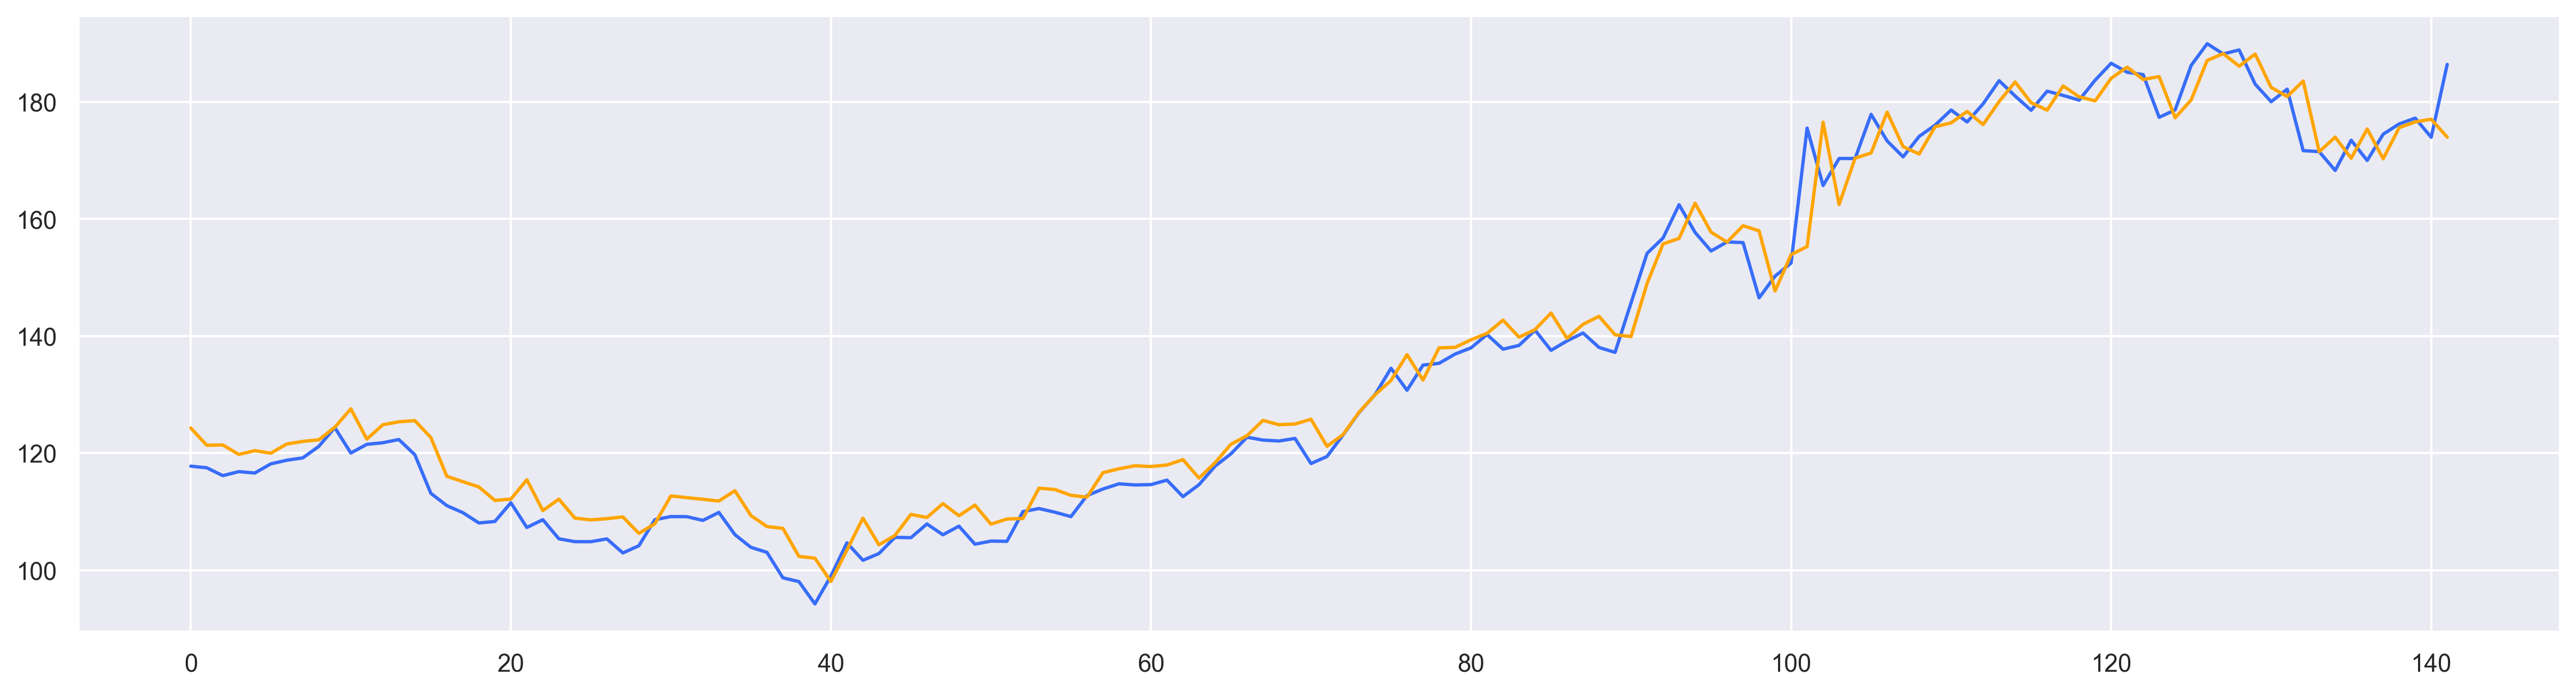

In [85]:
y = pd.DataFrame(y_test_rescaled)
p = pd.DataFrame(lstm_pred)
plt.plot(y, label = 'Test')
plt.plot(p, label = 'Predicted',color = 'orange')

___

* ### <font color = 'candy'> <u> COMPARING THE RESULTS 

In [86]:
Results = {"MODEL" :pd.Series(["Linear_model", "Exponential_model", "Quadratic", "ARIMA_original_data", "ARIMA_Stationay_data",
                              "ARIMA_Stationary_Scaled_Data", "Prophet_model", "LSTM_Model"]),
           "RMSE_Values":pd.Series([rmse_linear, rmse_exponential, rmse_quadratic, rmse_arima_original, rmse_arima_stationary,
                                   rmse_arima_stationary_sc, rmse_prophet, rmse_lstm])}
rmse_table = pd.DataFrame(Results).sort_values(['RMSE_Values']).reset_index(drop= True)
rmse_table 

MODEL  RMSE_Values
0                    LSTM_Model     4.619854
1             Exponential_model   192.221705
2                 Prophet_model   261.637908
3                     Quadratic   301.812255
4  ARIMA_Stationary_Scaled_Data   583.195640
5                  Linear_model   935.799988
6           ARIMA_original_data  2897.863871
7          ARIMA_Stationay_data  3623.840401

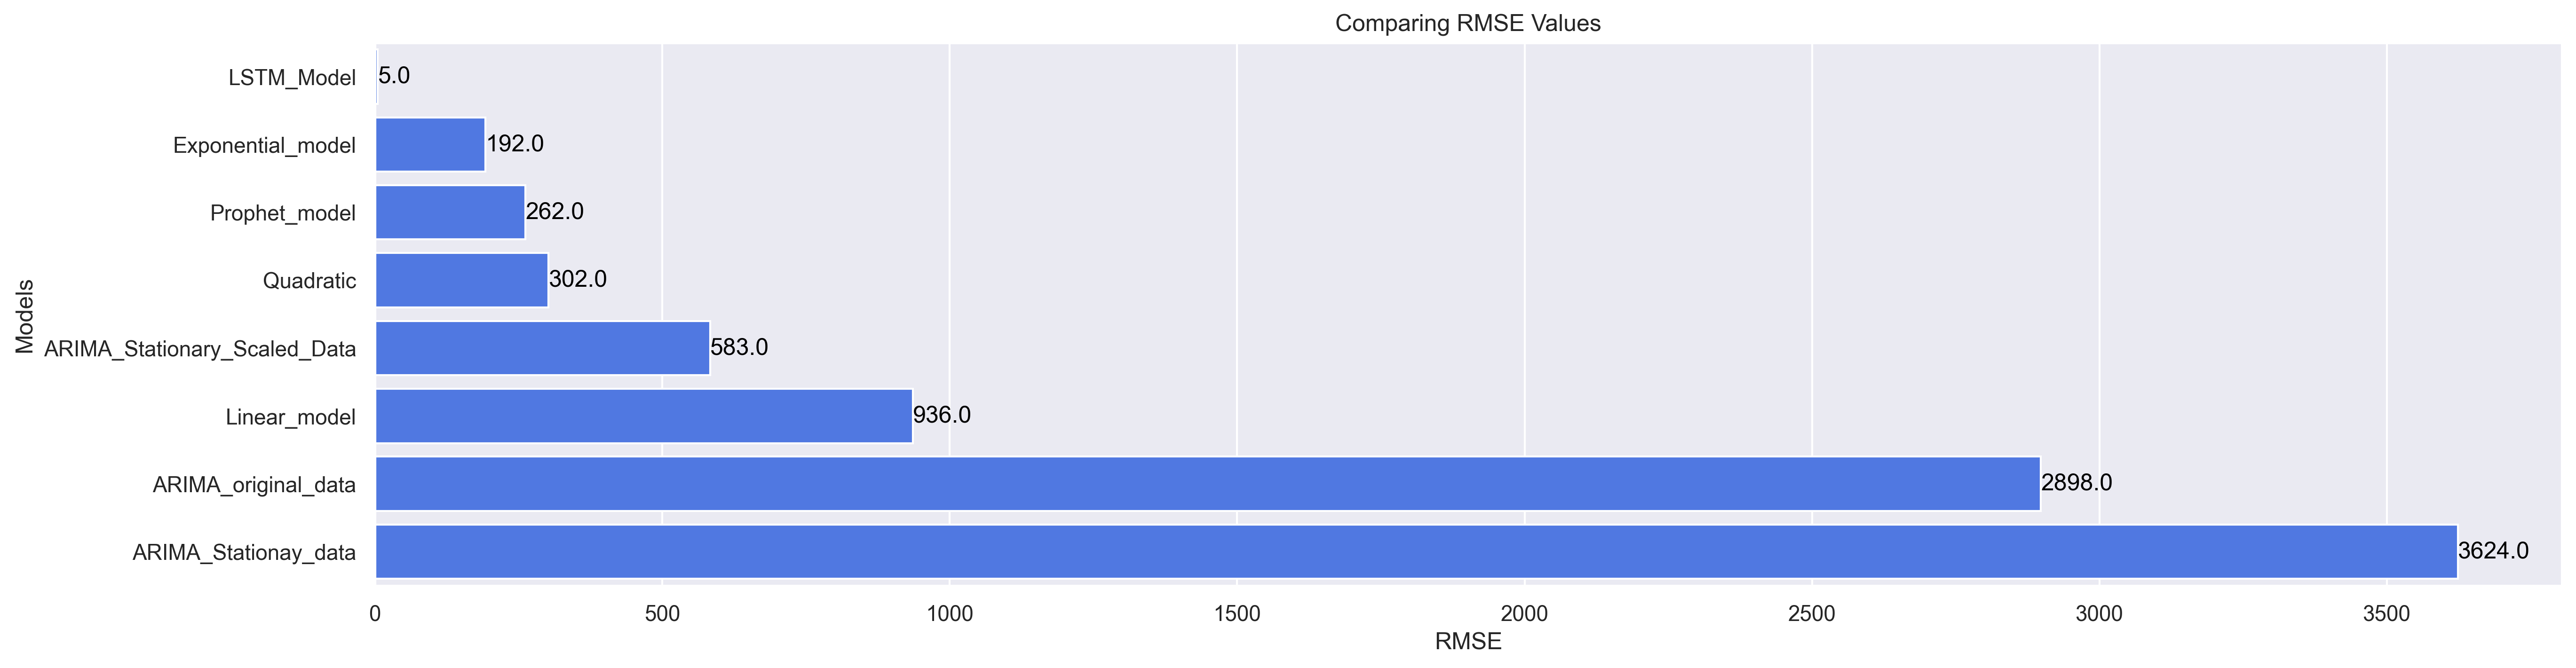

In [87]:
ax = sns.barplot(x = rmse_table['RMSE_Values'], y = rmse_table['MODEL'])
plt.xlabel('RMSE')
plt.ylabel('Models')
plt.title('Comparing RMSE Values')

# Annotate bars with values:
for i, v in enumerate(round(rmse_table['RMSE_Values'])):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

> * <font color ="navy">  We got least RMSE value for LSTM model followed by Exponential model and then Prophet model.
> * <font color ="navy"> LSTM model outperformed other models due to its ability to effectively capture long-term dependencies, handle nonlinear relationships and automatically extract relevant features from the data. Additionally, it is robust to noise, flexible in architecture and excel at capturing temporal dynamics.
> * <font color ="navy"> As our data clearly shows exponential trend, so the Exponential Model also working well.




> * <font color = "brown "> Finally we will Select <b> Prophet Model </b> for forecasting as its ability to handle seasonality, holidays, and outliers effectively.
> * <font color = "brown ">Also it provides <b> Uncertainty Intervals</b> for predicted values within which future observations are expected to fall with a certain level of confidence.
> * <font color = "brown "> By providing uncertainty intervals, Prophet enables users to make informed decisions and assess the reliability of their forecasts. This feature is useful in our scenario(financial sector) where accurate estimation of uncertainty is critical.
ent.

___

* ### <font color = 'candy'> <u> PREDICTION FOR NEXT YEAR
* We will predict "Close" Stock Prices for next financial year April 2024 to March 2025 

In [88]:
# Forecasting for next year:

num_periods  = int(input("Enter the number of Days for forecasting: "))

data = df_stock.rename(columns= {'Date': 'ds', 'Close': 'y'})

model = Prophet()
model.fit(data)

future_dates = model.make_future_dataframe(periods = num_periods)  
forecast = model.predict(future_dates)

forecast_values = forecast[['ds', 'yhat_lower', 'yhat_upper','yhat']].tail(num_periods)
forecast_values

Enter the number of Days for forecasting:  365


20:02:43 - cmdstanpy - INFO - Chain [1] start processing
20:02:46 - cmdstanpy - INFO - Chain [1] done processing


ds   yhat_lower   yhat_upper         yhat
5985 2024-03-29  2601.612260  2869.183549  2738.341428
5986 2024-03-30  2749.658510  3013.674909  2880.549221
5987 2024-03-31  2534.907879  2781.136441  2661.444991
5988 2024-04-01  2622.124933  2884.021664  2744.955196
5989 2024-04-02  2625.381335  2878.403842  2748.216341
...         ...          ...          ...          ...
6345 2025-03-24  2906.084503  3177.056578  3043.793908
6346 2025-03-25  2906.443312  3183.797151  3046.887086
6347 2025-03-26  2917.977309  3182.250746  3047.407847
6348 2025-03-27  2915.615202  3184.827285  3049.632981
6349 2025-03-28  2910.720216  3176.484570  3048.359663

[365 rows x 4 columns]

<Axes: >

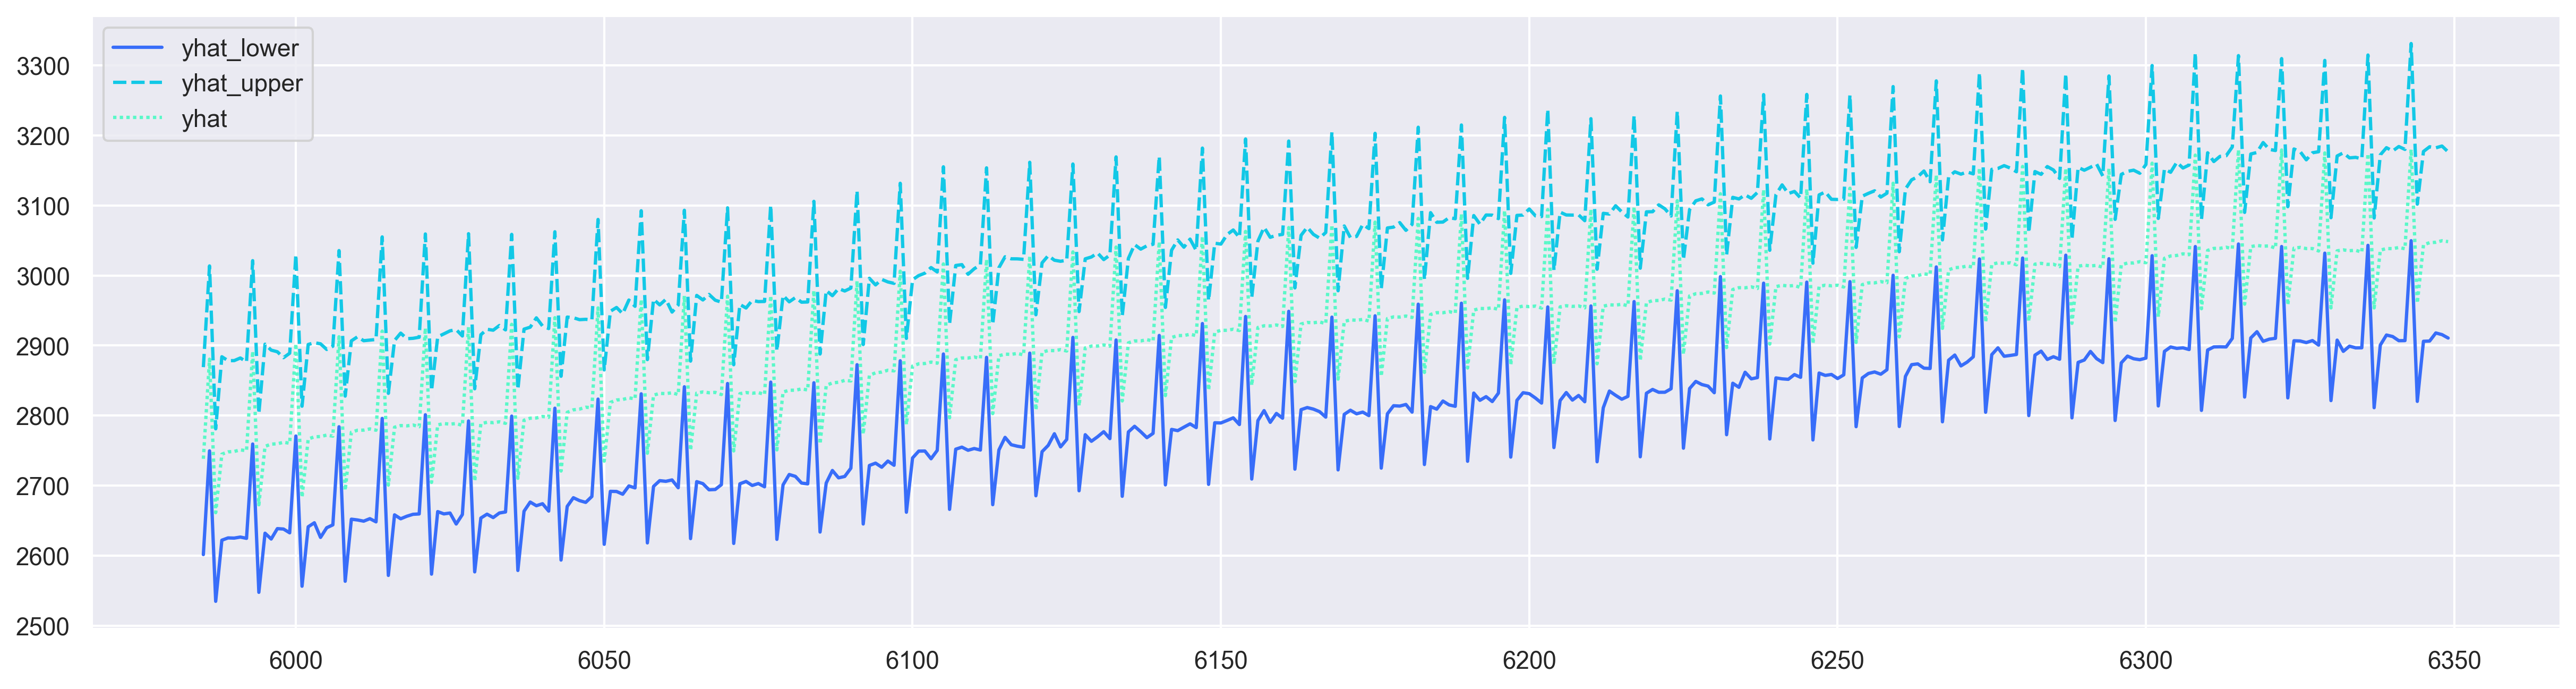

In [89]:
sns.lineplot(forecast_values.drop(['ds'], axis= 1))

> * <font color ="navy"> Our predicted values for "Close" Stock Prices will increase in next year from 2738 to 3048.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___